## Imports

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ta.volatility import BollingerBands, AverageTrueRange
from ta.momentum import RSIIndicator

# Strategy: Combining Bollinger Bands, RSI, and ATR

This strategy integrates three strong technical indicators—Bollinger Bands, Relative Strength Index (RSI), and Average True Range (ATR)—to generate buy and sell signals. These indicators help identify potential trend reversals, momentum shifts, and market volatility, providing a well-rounded approach to decision-making in trading.

### Key Indicators Explained:
1. **Bollinger Bands**: These bands consist of a moving average and two standard deviation lines (upper and lower bands). The bands expand and contract based on price volatility, helping traders identify overbought or oversold conditions. Prices that move outside the bands often signal potential reversals.
   
2. **Relative Strength Index (RSI)**: A momentum oscillator that measures the speed and change of price movements. Values above 70 suggest overbought conditions, while values below 30 suggest oversold conditions. RSI helps confirm whether the current price move has momentum or is likely to reverse.

3. **Average True Range (ATR)**: This measures market volatility by calculating the range between the highest and lowest prices during a period. A higher ATR indicates increased volatility, while a lower ATR shows a more stable market. In this strategy, ATR is used as a filter to avoid trading during periods of excessive market noise.

---

## Initial Setup and Optimized Parameters

The strategy is initialized by downloading historical stock data (e.g., Meta, Apple, Amazon, Netflix, and Google) and computing the Bollinger Bands, RSI, and ATR for each stock. The parameters used for each indicator a:

- **Bollinger Bands**: A window of 20 periods and 2 standard deviations is selected, allowing the bands to adjust to typical price swings.
- **RSI Window**: A 21-period window is chosen, which is different from the usual 14-day period for identifying overbought and oversold conditions.
- **ATR Window**: A 14-period ATR is used to capture the stock’s volatility trends.

These parameters have been adjusted and optimized to yield the highest sharpe ratio for our strategy among other parameters tested during the tuning process.

---

## Signal Generation and Positioning Logic

### Buy and Sell Conditions:

- **Buy Signal**: The strategy buys when the price falls below the lower Bollinger Band and RSI drops below 30, indicating the stock is oversold.
  
- **Sell Signal**: The strategy sells when the price moves above the upper Bollinger Band, RSI rises above 70, and the ATR value exceeds the 75th percentile. These conditions suggest the stock is overbought and volatile, increasing the likelihood of a pullback.

### Position Management:

The strategy ensures alternating signals between long and short positions. It does not stay out of the market; if there is no valid signal, it maintains the previous position, thereby always staying invested.

### Performance Visualization
The strategy's performance is visualized by plotting the stock price, signals, and the cumulative returns over time. The comparison is made with a simple buy-and-hold strategy.

## Descriptions of the Plots 

### 1. **Price and Signals Plot**:
   - **Purpose**: This plot displays the stock’s adjusted close price over time and visually indicates where the strategy generates buy and sell signals.
   - **Components**:
     - **Stock Price**: Plotted as a continuous blue line, representing the adjusted closing price of the stock.
     - **Buy Signals**: Indicated by green upward-facing triangles (`^`) at points where the strategy triggers a buy.
     - **Sell Signals**: Indicated by red downward-facing triangles (`v`) at points where the strategy triggers a sell.
   - **Usage**: This plot helps visualize the moments where the strategy enters or exits positions and how these signals correspond with price movements.

---

### 2. **Price and Bollinger Bands Plot**:
   - **Purpose**: This plot shows the relationship between the stock price and the Bollinger Bands (upper and lower), which are used to identify overbought and oversold conditions.
   - **Components**:
     - **Stock Price**: Plotted as a continuous blue line, representing the adjusted closing price.
     - **Upper Band**: A green dashed line representing the upper Bollinger Band.
     - **Lower Band**: A red dashed line representing the lower Bollinger Band.
     - **Moving Average**: An orange line representing the simple moving average (SMA), which is used to calculate the Bollinger Bands.
   - **Usage**: This plot shows how the stock price interacts with the upper and lower bands. When the price moves outside these bands, it may indicate a potential reversal (overbought or oversold), triggering buy or sell signals.

---

### 3. **RSI (Relative Strength Index) Plot**:
   - **Purpose**: This plot displays the RSI (a momentum indicator) over time to help identify whether the stock is overbought or oversold.
   - **Components**:
     - **RSI Line**: A purple line representing the RSI value at each point in time.
     - **Overbought Line (70)**: A green dashed line at an RSI level of 70, marking the overbought threshold.
     - **Oversold Line (30)**: A red dashed line at an RSI level of 30, marking the oversold threshold.
   - **Usage**: The RSI plot helps visualize the stock’s momentum. When the RSI crosses above 70, it suggests overbought conditions (potential for a sell), and when it crosses below 30, it indicates oversold conditions (potential for a buy).

---

### 4. **ATR (Average True Range) Plot**:
   - **Purpose**: This plot shows the ATR over time, which measures the volatility of the stock.
   - **Components**:
     - **ATR Line**: A magenta line representing the ATR value at each point in time.
   - **Usage**: The ATR plot helps assess the level of volatility in the stock. Higher ATR values indicate more significant price fluctuations (more volatility), while lower ATR values indicate more stable price movement. The ATR is used in the strategy to filter out high-risk periods.

---

### 5. **Histogram of Strategy and Stock Log Returns**:
   - **Purpose**: This histogram provides a visual representation of the distribution of log returns for both the strategy and the stock itself.
   - **Components**:
     - **Strategy Log Returns**: A blue histogram representing the distribution of log returns generated by the strategy. 
     - **Stock Log Returns**: A green histogram representing the distribution of log returns for the stock.
   - **Usage**: The histograms help compare the performance and risk of the strategy versus the stock’s natural price movement. Wider distributions indicate more volatility, while narrower distributions show more consistency in returns.

---

### 6. **Drawdown Plot**:
   - **Purpose**: This plot visualizes the drawdowns (percentage declines from peak to trough) for both the strategy and the stock itself.
   - **Components**:
     - **Strategy Cumulative Returns**: A blue line representing the cumulative returns of the strategy over time.
     - **Cumulative Max**: A red dashed line showing the maximum cumulative return achieved at each point in time.
     - **Drawdown Area**: The shaded area between the cumulative max and the cumulative returns line indicates the periods where the strategy or stock is in a drawdown.
   - **Usage**: This plot is useful for understanding how much the strategy (or the stock) has declined from its highest point. It helps evaluate the strategy’s risk in terms of capital drawdowns.

---

### 7. **Cumulative Returns Plot: Strategy vs Stock (Buy-and-Hold)**:
   - **Purpose**: This plot compares the cumulative returns of the strategy against a simple buy-and-hold approach.
   - **Components**:
     - **Strategy Cumulative Returns**: An orange line showing the cumulative returns generated by the strategy.
     - **Stock Cumulative Returns**: A blue line representing the cumulative returns of a buy-and-hold strategy for the stock.
   - **Usage**: This plot directly compares the performance of the strategy to the performance of holding the stock over the same time period. It shows how much the strategy outperforms or underperforms the stock.

---


In [2]:
class Strategy2:
    def __init__(self, stock_symbol, start_date, end_date, bb_window, bb_sd, rsi_window, atr_window):
        self.stock_symbol = stock_symbol
        self.start_date = start_date
        self.end_date = end_date
        self.stock_data = self.get_stock_data() # Retrieve historical stock data
        self.calculate_bollinger_bands(window=bb_window, std_dev=bb_sd) # Calculate Bollinger Bands with a window of 20 and standard dev of 2
        self.calculate_RSI(window=rsi_window) # Calculate RSI with a window of 14
        self.calculate_ATR(window=atr_window) # Calculate ATR with a window of 14

    def get_stock_data(self):
        df = pd.DataFrame()
        ticker_data = yf.download(self.stock_symbol, self.start_date, self.end_date).reset_index()
        df['Date'] = ticker_data['Date']
        df[f'{self.stock_symbol}_Adj_Close'] = ticker_data['Adj Close']
        df[f'{self.stock_symbol}_Returns'] = df[f'{self.stock_symbol}_Adj_Close'].pct_change()
        df[f'{self.stock_symbol}_High'] = ticker_data['High']
        df[f'{self.stock_symbol}_Low'] = ticker_data['Low']
        return df

    def calculate_bollinger_bands(self, window, std_dev):
        bb_indicator = BollingerBands(close=self.stock_data[f'{self.stock_symbol}_Adj_Close'], window=window, window_dev=std_dev)
        self.stock_data['Upper_Band'] = bb_indicator.bollinger_hband()
        self.stock_data['Lower_Band'] = bb_indicator.bollinger_lband()
        self.stock_data['Moving_Average'] = bb_indicator.bollinger_mavg()

    def calculate_RSI(self, window):
        rsi_indicator = RSIIndicator(close = self.stock_data[f'{self.stock_symbol}_Adj_Close'], window=window, fillna= False)
        self.stock_data['RSI'] = rsi_indicator.rsi()

    def calculate_ATR(self, window):
        atr_indicator = AverageTrueRange(high=self.stock_data[f'{self.stock_symbol}_High'], low=self.stock_data[f'{self.stock_symbol}_Low'], close=self.stock_data[f'{self.stock_symbol}_Adj_Close'], window=window)
        self.stock_data['ATR'] = atr_indicator.average_true_range()

    def generate_signals_positions(self):
        self.stock_data['Signal'] = 0
        self.stock_data['Position'] = 0

        # Define an ATR threshold for volatility filter
        atr_threshold = self.stock_data['ATR'].quantile(0.75)

        # Set the first day's signal to buy (long position)
        self.stock_data.loc[0, 'Signal'] = 1  # Instantly buy on the first day

        # Loop through the stock data starting from the second day
        for i in range(1, len(self.stock_data)):
            price = self.stock_data.loc[i, f'{self.stock_symbol}_Adj_Close']
            upper_band = self.stock_data.loc[i, 'Upper_Band']
            lower_band = self.stock_data.loc[i, 'Lower_Band']
            rsi = self.stock_data.loc[i, 'RSI']
            atr = self.stock_data.loc[i, 'ATR']

            # Get previous signal to ensure alternation of positions
            previous_signal = self.stock_data.loc[i - 1, 'Signal']

            # Bollinger Band logic with additional RSI and ATR conditions:
            # Buy when price is below the lower band and RSI indicates oversold (<30)
            if price < lower_band and rsi < 30:
                self.stock_data.loc[i, 'Signal'] = 1
            # Sell when price is above the upper band, RSI indicates overbought (>70) and ATR > ATR_threshold
            elif price > upper_band and rsi > 70 and atr > atr_threshold:
                self.stock_data.loc[i, 'Signal'] = -1
            else:
                # No confirmation from technical indicators, do not change from previous signal
                self.stock_data.loc[i, 'Signal'] = previous_signal

        # Shift the signal to create the 'Position' (previous day's signal)
        self.stock_data['Position'] = self.stock_data['Signal'].shift(1)

        # Update the signal if there's a change
        self.stock_data['Signal'] = np.where(
            self.stock_data['Signal'] != self.stock_data['Position'],
            self.stock_data['Signal'],  
            0 
        )

    def plot_price_and_signals(self):
        plt.figure(figsize=(14, 6))
        plt.plot(self.stock_data['Date'], self.stock_data[f'{self.stock_symbol}_Adj_Close'], label='Price', color='blue')
        plt.plot(self.stock_data['Date'][self.stock_data['Signal'] == 1],
                 self.stock_data[f'{self.stock_symbol}_Adj_Close'][self.stock_data['Signal'] == 1],
                 '^', color='g', label='Buy Signal', alpha=0.5)
        plt.plot(self.stock_data['Date'][self.stock_data['Signal'] == -1],
                 self.stock_data[f'{self.stock_symbol}_Adj_Close'][self.stock_data['Signal'] == -1],
                 'v', color='r', label='Sell Signal', alpha=0.5)
        plt.ylabel('Price')
        plt.title(f'{self.stock_symbol} - Price and Signals')
        plt.legend()
        plt.show()

    def plot_price_and_bollinger_bands(self):
        plt.figure(figsize=(14, 6))
        plt.plot(self.stock_data['Date'], self.stock_data[f'{self.stock_symbol}_Adj_Close'], label='Price', color='blue')
        plt.plot(self.stock_data['Date'], self.stock_data['Upper_Band'], label='Upper Bollinger Band', color='green', linestyle='--')
        plt.plot(self.stock_data['Date'], self.stock_data['Lower_Band'], label='Lower Bollinger Band', color='red', linestyle='--')
        plt.plot(self.stock_data['Date'], self.stock_data['Moving_Average'], label='Moving Average (20)', color='orange')
        plt.ylabel('Price')
        plt.title(f'{self.stock_symbol} - Price and Bollinger Bands')
        plt.legend()
        plt.show()

    def plot_rsi(self):
        plt.figure(figsize=(14, 6))
        plt.plot(self.stock_data['Date'], self.stock_data['RSI'], label='RSI', color='purple')
        plt.axhline(30, color='red', linestyle='--', label='Oversold (30)')
        plt.axhline(70, color='green', linestyle='--', label='Overbought (70)')
        plt.ylabel('RSI')
        plt.ylim(0, 100)
        plt.title(f'{self.stock_symbol} - RSI')
        plt.legend()
        plt.show()

    def plot_atr(self):
        plt.figure(figsize=(14, 6))  
        plt.plot(self.stock_data['Date'], self.stock_data['ATR'], label='ATR', color='magenta')
        plt.ylabel('ATR')
        plt.title(f'{self.stock_symbol} - Average True Range (ATR)')
        plt.legend()
        plt.show()

    def plot_histograms(self):

        self.stock_data['Log Return'] = np.log(self.stock_data[f'{self.stock_symbol}_Adj_Close'] / self.stock_data[f'{self.stock_symbol}_Adj_Close'].shift(1))
        self.stock_data[f'{self.stock_symbol}_Strategy_Log_Returns'] = self.stock_data['Log Return'] * self.stock_data['Position']

        # Create a single function to plot histograms
        def plot_histogram(data, ax, title, color):
            ax.hist(data.dropna(), bins=30, color=color, alpha=0.7)
            ax.set_title(title)
            ax.set_xlabel('Log Returns')
            ax.set_ylabel('Frequency')
            ax.grid(True)

        # Create subplots for strategy log returns and stock log returns
        fig, ax = plt.subplots(1, 2, figsize=(14, 5))

        # Plot the strategy and stock log returns using the helper function
        plot_histogram(self.stock_data[f'{self.stock_symbol}_Strategy_Log_Returns'], ax[0], f"Strategy Log Returns for {self.stock_symbol}", 'blue')
        plot_histogram(self.stock_data['Log Return'], ax[1], f"Stock Log Returns for {self.stock_symbol}", 'green')

        # Adjust layout and show the plot
        plt.tight_layout()
        plt.show()


    def plot_drawdown(self):
        # Helper function to calculate cumulative returns and drawdown
        def calculate_drawdown(returns, ax, title, color):
            cumulative_returns = (1 + returns).cumprod()
            cum_max = cumulative_returns.cummax()
            drawdown = cum_max - cumulative_returns
            ax.plot(self.stock_data['Date'], cumulative_returns, label='Cumulative Returns', color=color)
            ax.plot(self.stock_data['Date'], cum_max, label='Cumulative Max', linestyle='--', color='red')
            ax.fill_between(self.stock_data['Date'], cum_max, cumulative_returns, color='red', alpha=0.3)
            ax.set_title(title)
            ax.legend()
            ax.grid(True)

        # Create subplots for strategy and buy-and-hold drawdowns
        fig, ax = plt.subplots(1, 2, figsize=(14, 6))

        # Plot drawdowns for both strategy and stock (buy-and-hold)
        calculate_drawdown(self.stock_data[f'{self.stock_symbol}_Strategy_Normal_Returns'], ax[0], f"Strategy Drawdown for {self.stock_symbol}", 'blue')
        calculate_drawdown(self.stock_data[f'{self.stock_symbol}_Returns'], ax[1], f"Buy-and-Hold Drawdown for {self.stock_symbol}", 'green')

        # Show the plots
        plt.tight_layout()
        plt.show()
    
    def calculate_strat_log_returns(self, position_col='Position', strategy_return_col='Strategy_Log_Return'):
        # Step 1: Calculate log returns for the stock if not already present
        if 'Log Return' not in self.stock_data.columns:
            self.stock_data['Log Return'] = np.log(self.stock_data[f'{self.stock_symbol}_Adj_Close'] / self.stock_data[f'{self.stock_symbol}_Adj_Close'].shift(1))
        
        # Step 2: Calculate strategy log returns by multiplying stock log returns by the position
        self.stock_data[strategy_return_col] = self.stock_data['Log Return'] * self.stock_data[position_col]

        # Step 3: Convert strategy log returns back to normal returns
        self.stock_data[f'{self.stock_symbol}_Strategy_Normal_Returns'] = np.exp(self.stock_data[strategy_return_col]) - 1

        # Step 4: Calculate the cumulative product of strategy normal returns (portfolio value)
        self.stock_data[f'Cumulative_Strategy_Returns'] = (1 + self.stock_data[f'{self.stock_symbol}_Strategy_Normal_Returns']).cumprod()

        # Step 5: Calculate cumulative stock returns (buy-and-hold strategy)
        self.stock_data[f'{self.stock_symbol}_Returns'] = np.exp(self.stock_data['Log Return']) - 1  # Stock normal returns
        self.stock_data[f'Cumulative_{self.stock_symbol}_Returns'] = (1 + self.stock_data[f'{self.stock_symbol}_Returns']).cumprod()

    def plot_strategy_vs_stock_returns(self):

        # Plot cumulative returns for stock and strategy
        plt.figure(figsize=(10, 6))
        plt.plot(self.stock_data.index, self.stock_data[f'Cumulative_{self.stock_symbol}_Returns'], label=f'{self.stock_symbol} Cumulative Returns', color='blue')
        plt.plot(self.stock_data.index, self.stock_data[f'Cumulative_Strategy_Returns'], label='Strategy Cumulative Returns', color='orange', linestyle='--')

        plt.title(f'Strategy vs {self.stock_symbol} Cumulative Returns')
        plt.xlabel('Date')
        plt.ylabel('Cumulative Returns')
        plt.legend()
        plt.grid(True)
        plt.show()

    def calculate_benchmark_returns(self):
        # Use SPY as the benchmark
        start = self.start_date
        end = self.end_date

        # Download the SPY data
        benchmark_data = yf.download('SPY', start=start, end=end).reset_index()

        # Calculate daily percentage returns for SPY
        benchmark_data['SPY_Returns'] = benchmark_data['Adj Close'].pct_change()

        # Convert percentage returns to log returns (for use in calculations)
        benchmark_data['Log_SPY_Returns'] = np.log1p(benchmark_data['SPY_Returns'])

        # Return only the daily log returns for further analysis
        return benchmark_data['SPY_Returns']


    def calculate_stock_metrics(self, risk_free_rate=0.00):
        """
        Calculate stock metrics including Alpha, Beta, Standard Deviation,
        Annualized Return, Sharpe Ratio, Maximum Drawdown, Sortino Ratio, Information Ratio, Calmar Ratio and Treynor Ratio.
        """
        # Daily log returns of the stock
        stock_returns = self.stock_data[f'{self.stock_symbol}_Returns']
        strategy_returns = self.stock_data[f'{self.stock_symbol}_Strategy_Normal_Returns']
        benchmark_returns = self.calculate_benchmark_returns()

        # Remove NaN values
        merged_data = pd.DataFrame({
            'stock_returns': stock_returns,
            'strategy_returns': strategy_returns,
            'benchmark_returns': benchmark_returns
        }).dropna()

        # Calculate Beta
        covariance_stock = np.cov(merged_data['stock_returns'], merged_data['benchmark_returns'])[0, 1]
        variance_stock = np.var(merged_data['benchmark_returns'])
        beta_stock = covariance_stock / variance_stock if variance_stock != 0 else np.nan

        covariance_strat = np.cov(merged_data['strategy_returns'], merged_data['benchmark_returns'])[0, 1]
        variance_strat = np.var(merged_data['benchmark_returns'])
        beta_strat = covariance_strat / variance_strat if variance_strat != 0 else np.nan

        # Calculate Alpha
        stock_yearly_return = merged_data['stock_returns'].mean() * 252
        strat_yearly_return = merged_data['strategy_returns'].mean() * 252
        benchmark_yearly_return = merged_data['benchmark_returns'].mean() * 252
        alpha_stock = (stock_yearly_return - risk_free_rate - beta_stock * (benchmark_yearly_return - risk_free_rate))
        alpha_strat = (strat_yearly_return - risk_free_rate - beta_strat * (benchmark_yearly_return - risk_free_rate))

        # Calculate Standard Deviation
        stock_daily_sd = merged_data['stock_returns'].std()
        strat_daily_sd = merged_data['strategy_returns'].std()
        std_dev_strat = strat_daily_sd * np.sqrt(252)  # Annualized standard deviation for Strategy
        std_dev_stock = stock_daily_sd * np.sqrt(252)  # Annualized standard deviation for Stock

        # Calculate Sharpe Ratio
        daily_SR_stock = (merged_data['stock_returns'].mean() - risk_free_rate) / stock_daily_sd
        daily_SR_strat = (merged_data['strategy_returns'].mean() - risk_free_rate) / strat_daily_sd
        annual_SR_stock = daily_SR_stock * np.sqrt(252)
        annual_SR_strat = daily_SR_strat * np.sqrt(252)

        # Calculate Maximum Drawdown
        cumulative_returns_strat = (1 + merged_data['strategy_returns']).cumprod()
        cum_max_strat = cumulative_returns_strat.cummax()
        drawdown_strat = cum_max_strat - cumulative_returns_strat
        max_drawdown_strat = drawdown_strat.max()

        cumulative_returns_stock = (1 + merged_data['stock_returns']).cumprod()
        cum_max_stock = cumulative_returns_stock.cummax()
        drawdown_stock = cum_max_stock - cumulative_returns_stock
        max_drawdown_stock = drawdown_stock.max()

        # Calculate Sortino Ratio
        converted_returns_strat = merged_data['strategy_returns'].apply(lambda x: 0 if x > 0 else x)
        squared_converted_returns_strat = converted_returns_strat ** 2
        squared_sum_converted_returns_strat = np.sum(squared_converted_returns_strat)
        downside_deviation_strat = np.sqrt(squared_sum_converted_returns_strat / len(converted_returns_strat))
        annual_converted_sd_strat = downside_deviation_strat * np.sqrt(252)
        sortino_ratio_strat = (strat_yearly_return) / annual_converted_sd_strat

        converted_returns_stock = merged_data['stock_returns'].apply(lambda x: 0 if x > 0 else x)
        squared_converted_returns_stock = converted_returns_stock ** 2
        squared_sum_converted_returns_stock = np.sum(squared_converted_returns_stock)
        downside_deviation_stock = np.sqrt(squared_sum_converted_returns_stock / len(converted_returns_stock))
        annual_converted_sd_stock = downside_deviation_stock * np.sqrt(252)
        sortino_ratio_stock = (stock_yearly_return) / annual_converted_sd_stock

        # Calculate Calmar Ratio
        calmar_ratio_strat = strat_yearly_return / max_drawdown_strat
        calmar_ratio_stock = stock_yearly_return / max_drawdown_stock

        # Calculate Treynor Ratio
        treynor_ratio_strat = (strat_yearly_return - risk_free_rate) / beta_strat
        treynor_ratio_stock = (stock_yearly_return - risk_free_rate) / beta_stock

        # Calculate Tracking Error 
        tracking_error_strat = np.std(merged_data['strategy_returns'] - merged_data['benchmark_returns']) * np.sqrt(252)
        tracking_error_stock = np.std(merged_data['stock_returns'] - merged_data['benchmark_returns']) * np.sqrt(252)

        # Calculate Information Ratio
        information_ratio_strat = (strat_yearly_return - benchmark_yearly_return) / tracking_error_strat
        information_ratio_stock = (stock_yearly_return - benchmark_yearly_return) / tracking_error_stock

        # Create a DataFrame to store the metrics
        metrics_df = pd.DataFrame({
            'Stock Returns': [stock_yearly_return],
            'Strat Returns': [strat_yearly_return],
            'Stock Alpha': [alpha_stock],
            'Strat Alpha': [alpha_strat],
            'Stock Beta': [beta_stock],
            'Strat Beta': [beta_strat],
            'Stock SD': [std_dev_stock],
            'Strat SD': [std_dev_strat],
            'Stock SR': [annual_SR_stock],
            'Strat SR': [annual_SR_strat],
            'Max Drawdown Stock': [max_drawdown_stock],
            'Max Drawdown Strat': [max_drawdown_strat],
            'Sortino Ratio Stock': [sortino_ratio_stock],
            'Sortino Ratio Strat': [sortino_ratio_strat],
            'Calmar Ratio Stock': [calmar_ratio_stock], 
            'Calmar Ratio Strat': [calmar_ratio_strat],
            'Treynor Ratio Stock': [treynor_ratio_stock], 
            'Treynor Ratio Strat': [treynor_ratio_strat],
            'Information Ratio Stock': [information_ratio_stock],
            'Information Ratio Strat': [information_ratio_strat]
        })

        # Set the stock as the row header (index)
        metrics_df.index = [self.stock_symbol]

        return metrics_df

    def plot_all_charts(self):
        # Plot signals and price chart
        self.plot_price_and_signals() 
        # Plot all technical indicators chart 
        self.plot_price_and_bollinger_bands() 
        self.plot_rsi() 
        self.plot_atr()
        # Plot additional charts to evaluate performance of strategy
        self.plot_histograms()
        self.plot_drawdown()
        self.plot_strategy_vs_stock_returns()

    def calculate_strat_returns(self):
        self.stock_data[f'{self.stock_symbol}_Strategy_Returns'] = self.stock_data[f'{self.stock_symbol}_Returns'] * self.stock_data['Position']

    def run_strategy(self):
        self.generate_signals_positions()
        self.calculate_strat_log_returns()
        self.calculate_strat_returns()

#### Declare parameters used for backtesting
* Start and End Date
* Stock symbols

In [3]:
start = '2015-01-01'
end = '2020-01-01'

indices = ['META', 'AAPL', 'AMZN', 'NFLX', 'GOOG']

## Performance Evaluation and Backtesting

The strategy is applied to five major tech stocks (Meta, Apple, Amazon, Netflix, and Google) over the period from **1st January 2015 to 31st Decemeber 2019**. The goal is to assess how well the strategy performs compared to a simple buy-and-hold approach.

### Parameter Optimization:

To find the optimal parameters for the best risk-adjusted returns, several combinations of Bollinger Bands window size, standard deviations, RSI windows, and ATR windows were tested. The results showed that:

- **Bollinger Bands Window**: 20
- **Bollinger Bands Standard Deviation**: 2
- **RSI Window**: 21
- **ATR Window**: 14

These parameters delivered the best Sharpe Ratio (1.79), which indicates the strategy’s superior risk-adjusted returns.

---

In [4]:
# bb_window_values = [10, 20, 30] 
# bb_sd_values = [1, 2, 3]        
# rsi_window_values = [9, 14, 21] 
# atr_window_values = [9, 14, 21] 

# best_sharpe = 0
# best_params = []

# # Assume risk free rate ot be 0
# def calc_sharpe_ratio(data, risk_free_rate=0):
#     avg_returns = data['Strat_Returns'].mean() - risk_free_rate
#     std = data['Strat_Returns'].std()
#     daily_SR = avg_returns / std
#     annual_SR = daily_SR * (252**0.5)
#     annual_SR = round(annual_SR, 2)
#     return annual_SR

# for bb_window in bb_window_values:
#     for bb_sd in bb_sd_values:
#         for rsi_window in rsi_window_values:
#             for atr_window in atr_window_values:
#                 test_df = pd.DataFrame()
#                 for index in indices:
#                     strategy2 = Strategy2(
#                         stock_symbol=index,
#                         start_date=start,
#                         end_date=end,
#                         bb_window=bb_window,
#                         bb_sd=bb_sd,
#                         rsi_window=rsi_window,
#                         atr_window=atr_window
#                     )
#                     strategy2.run_strategy()
#                     if test_df.empty:
#                         test_df = strategy2.stock_data[['Date', f'{index}_Strategy_Returns']]
#                     else:
#                         # Merge subsequent stock data by Date column
#                         test_df = pd.merge(test_df, strategy2.stock_data[['Date', f'{index}_Strategy_Returns']], on='Date', how='inner')
#                 daily_index_return_columns = [col for col in test_df.columns if '_Strategy_Returns' in col]
#                 test_df['Strat_Returns'] = test_df[daily_index_return_columns].mean(axis=1)

#                 curr_sharpe = calc_sharpe_ratio(test_df)
#                 if curr_sharpe > best_sharpe:
#                     best_sharpe = curr_sharpe
#                     best_params = [bb_window, bb_sd, rsi_window, atr_window]

In [5]:
# Assign best_bb_window, best_bb_sd, best_rsi_window, best_atr_window
try:
    best_bb_window = best_params[0]
    best_bb_sd = best_params[1]
    best_rsi_window = best_params[2]
    best_atr_window = best_params[3]
    print("Best Sharpe Ratio from Parameter Tuning: ", best_sharpe)
    print("Best Parameters from Parameter Tuning:")
    print("Best Bollinger Band Windows: ", best_bb_window)
    print("Best Bollinger Band std: ", best_bb_sd)
    print("Best RSI window: ", best_rsi_window)
    print("Best ATR window: ", best_atr_window)
except (IndexError, NameError):
    best_bb_window = 20
    best_bb_sd = 2
    best_rsi_window = 21
    best_atr_window = 14
    best_sharpe = 1.79
    print("Best Sharpe Ratio from Parameter Tuning: ", best_sharpe)
    print("Best Parameters from Parameter Tuning:")
    print("Best Bollinger Band Windows: ", best_bb_window)
    print("Best Bollinger Band std: ", best_bb_sd)
    print("Best RSI window: ", best_rsi_window)
    print("Best ATR window: ", best_atr_window)

Best Sharpe Ratio from Parameter Tuning:  1.79
Best Parameters from Parameter Tuning:
Best Bollinger Band Windows:  20
Best Bollinger Band std:  2
Best RSI window:  21
Best ATR window:  14


## Running the Strategy
With the best parameters identified, the strategy is applied to the selected stocks (MAANG). The performance is visualized, and metrics are calculated for each stock.


[*********************100%%**********************]  1 of 1 completed


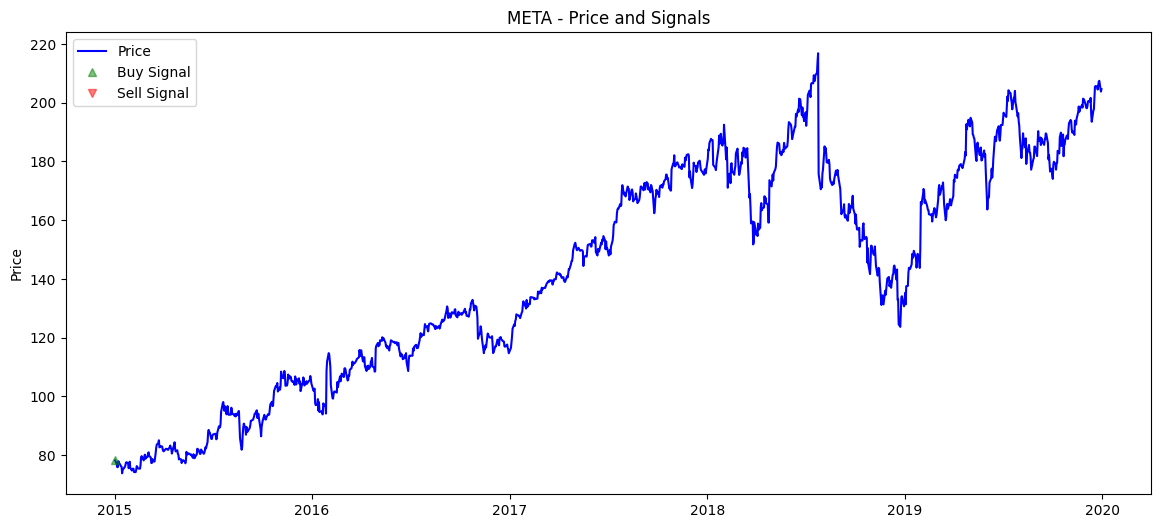

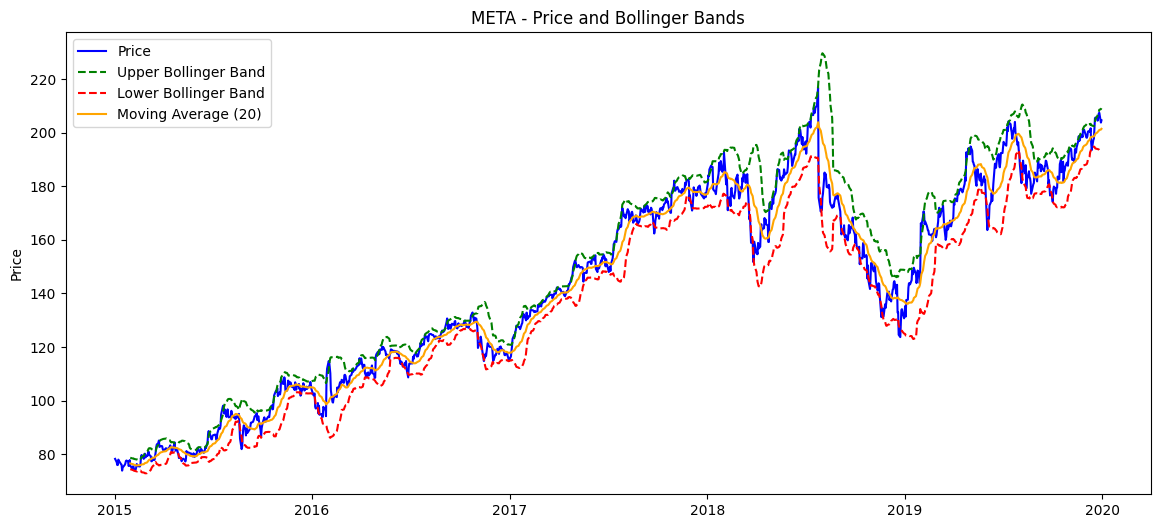

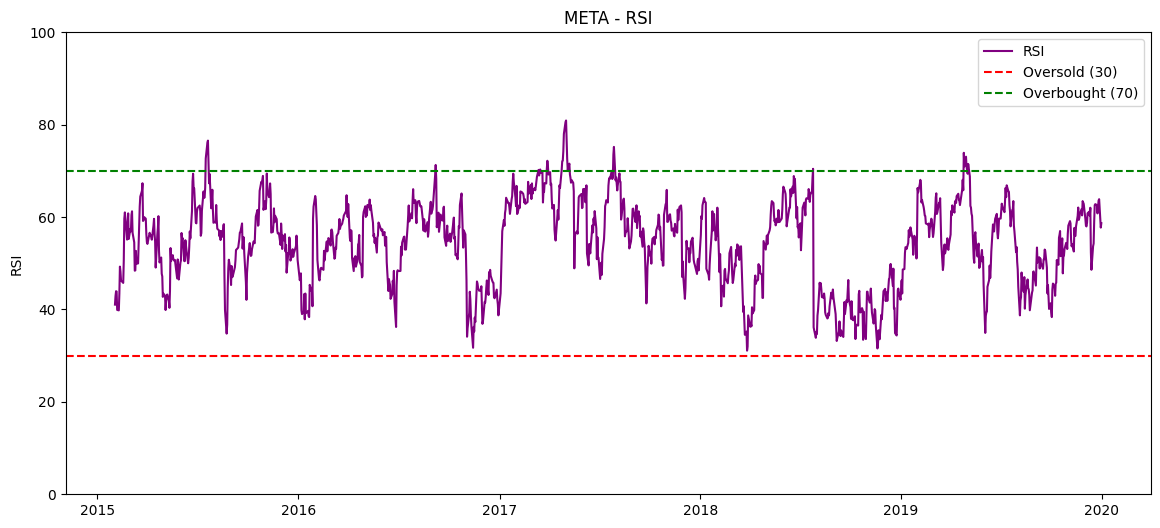

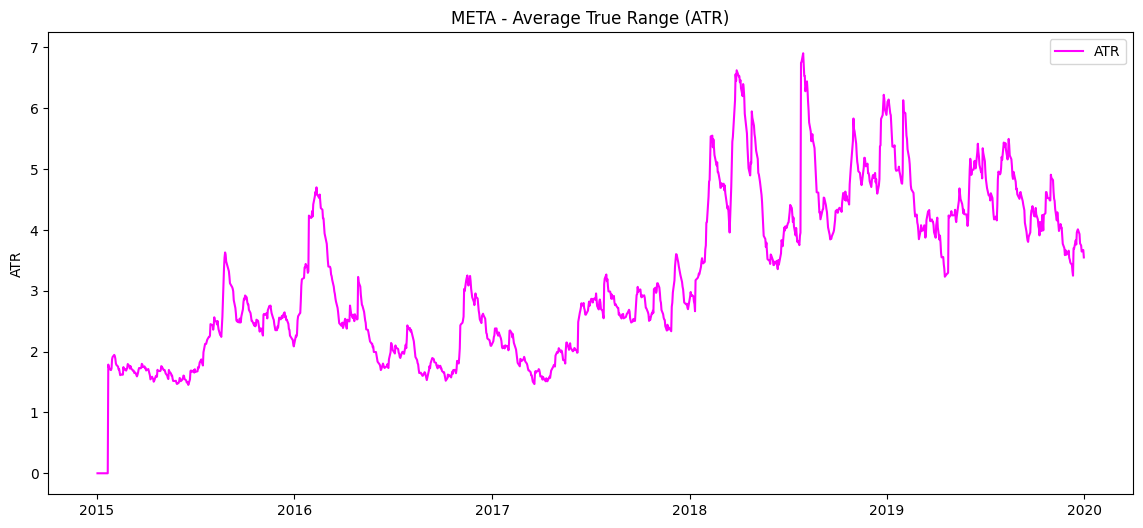

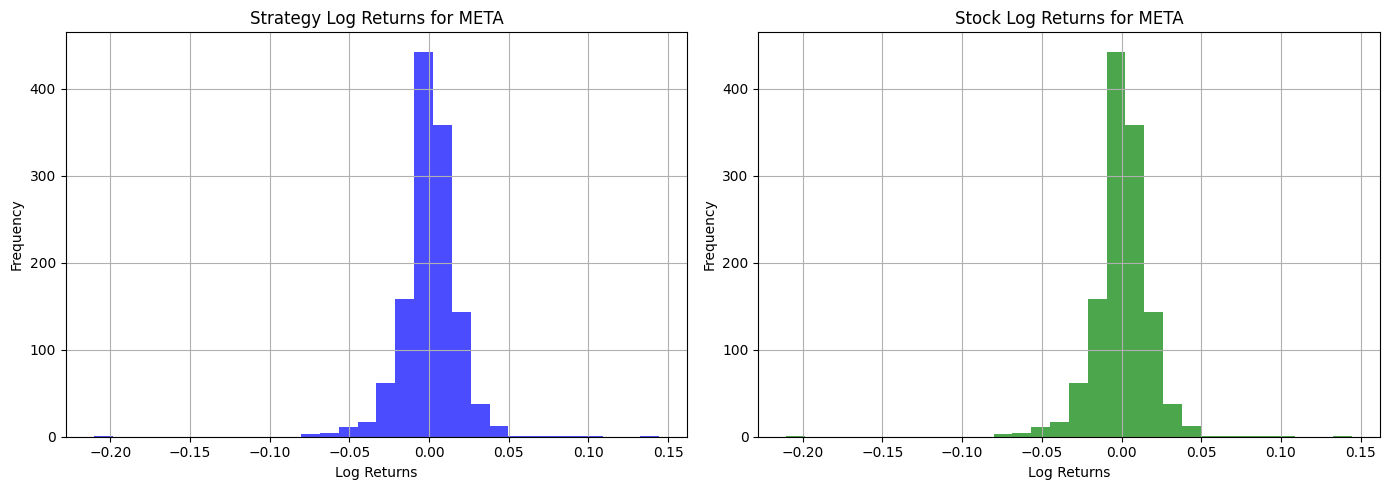

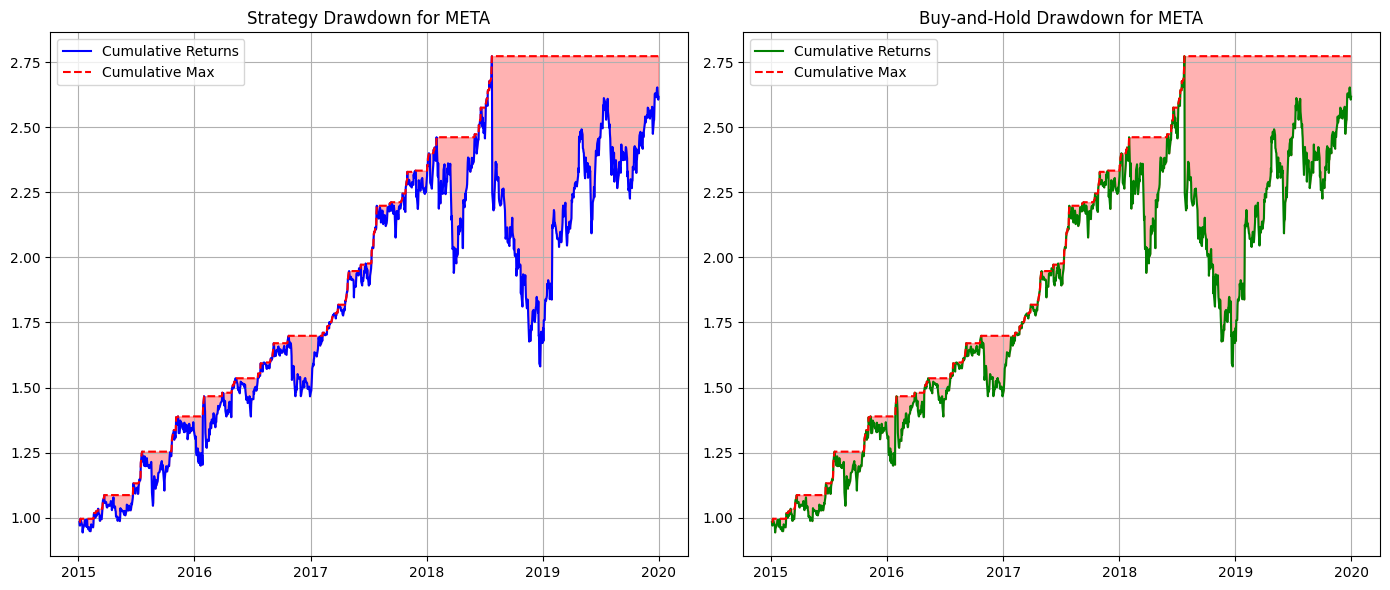

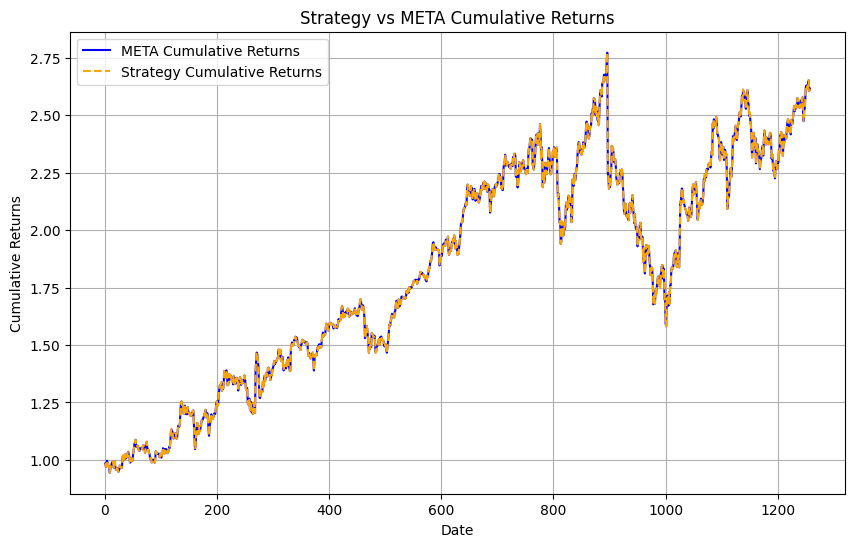

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


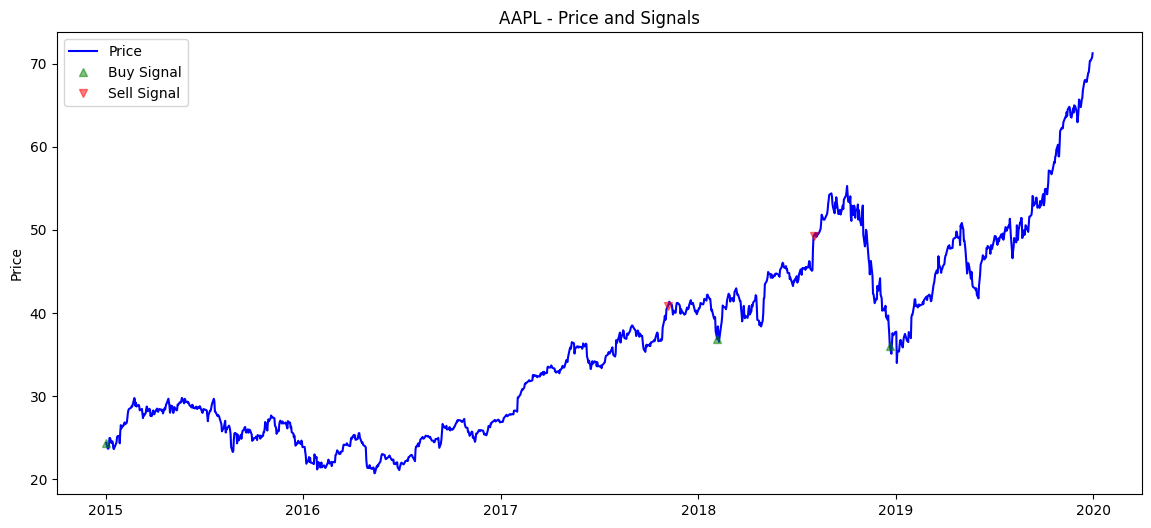

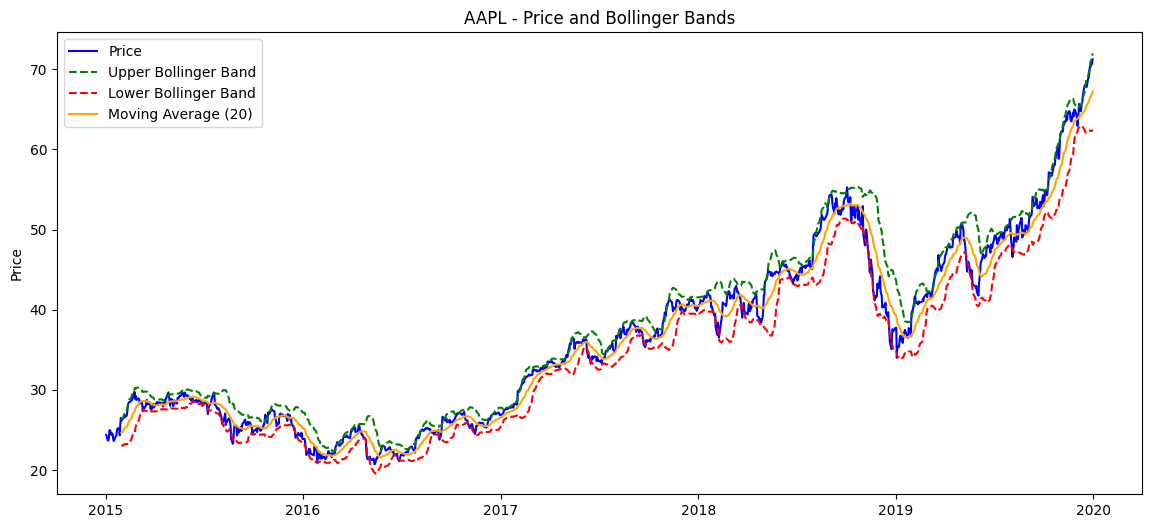

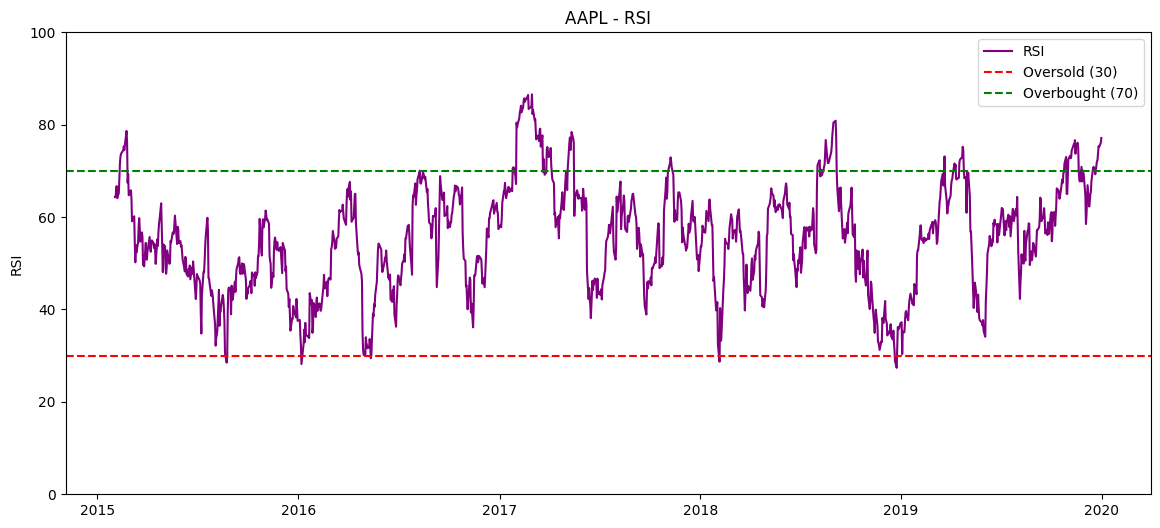

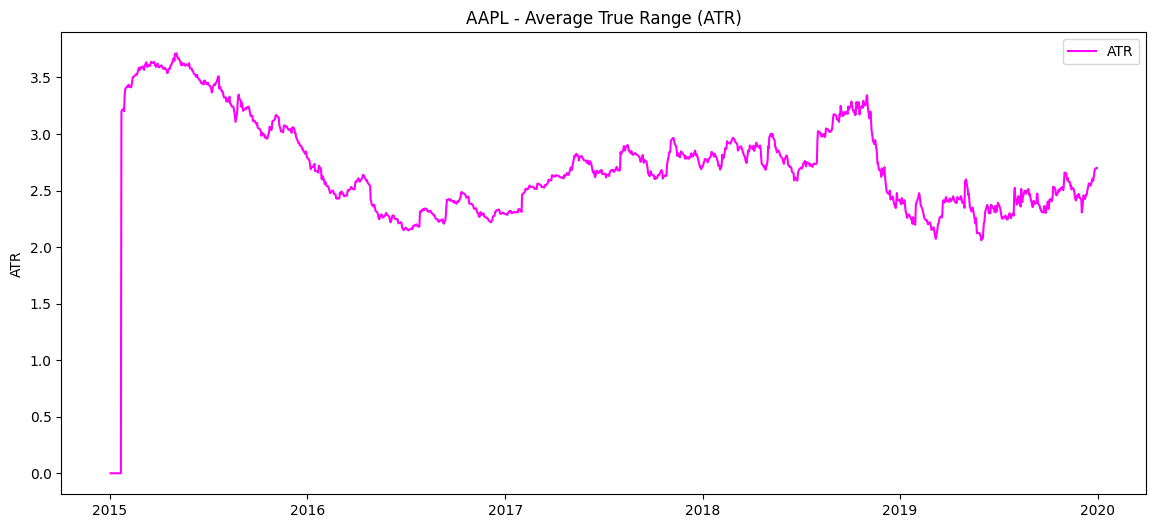

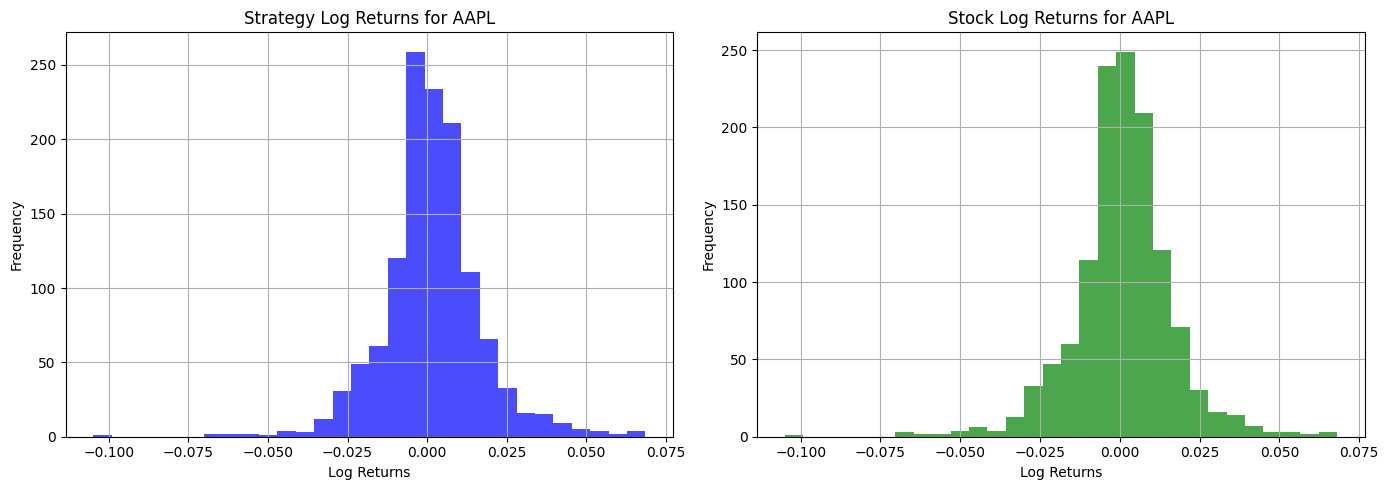

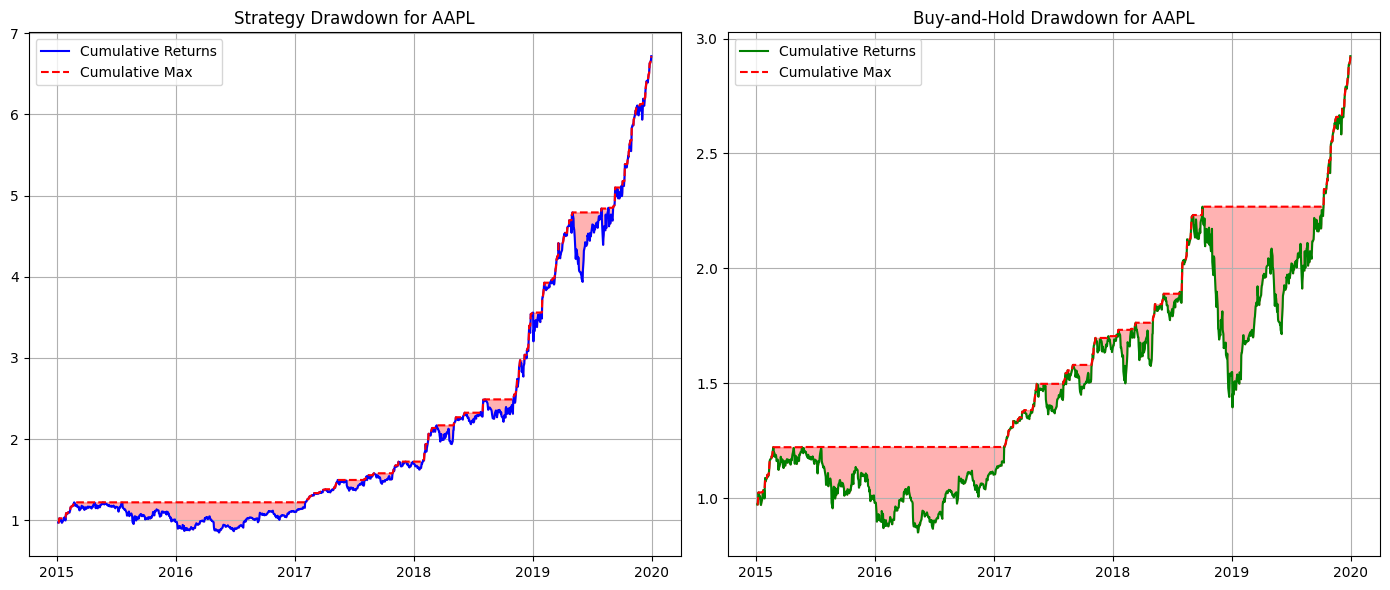

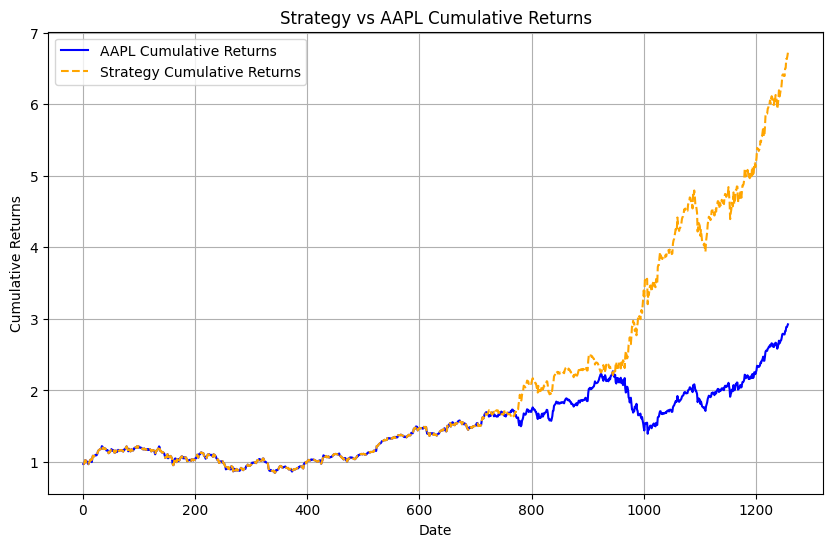

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


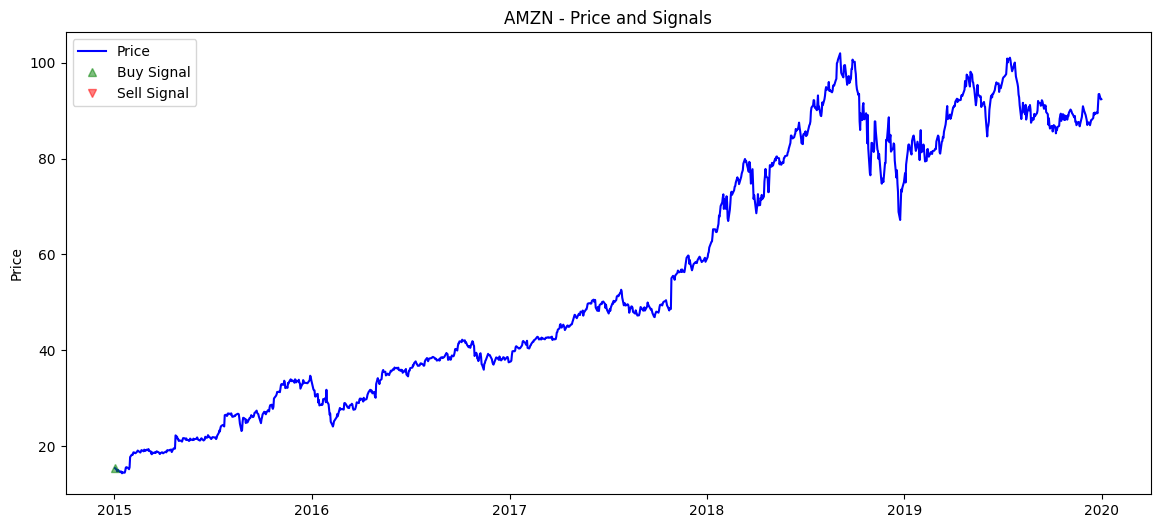

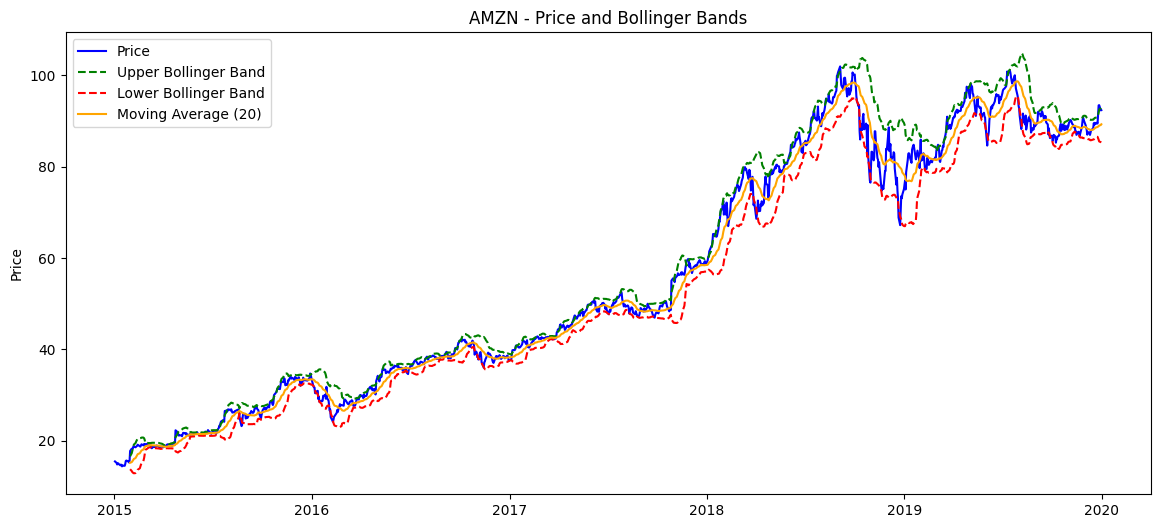

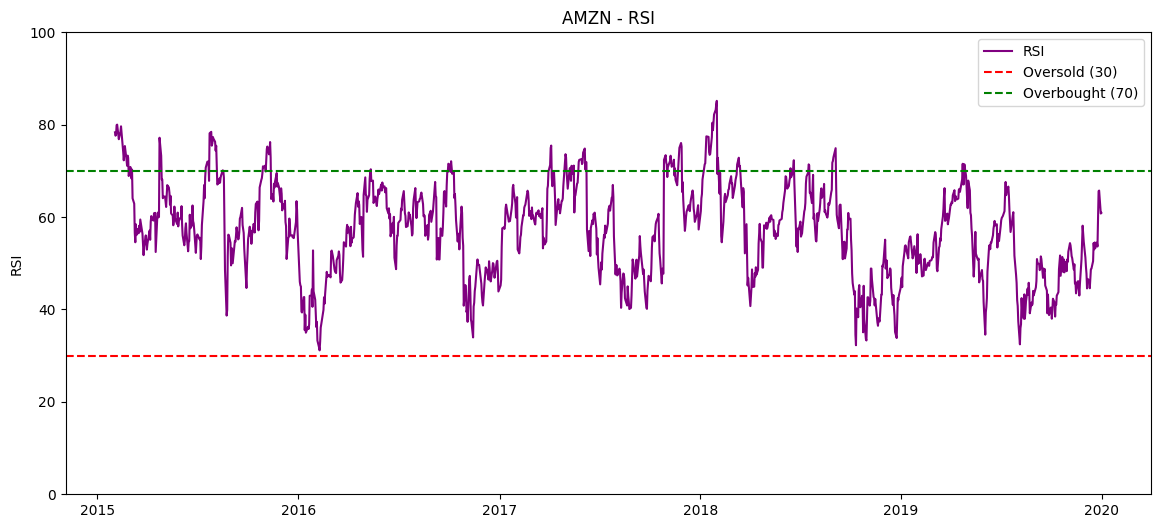

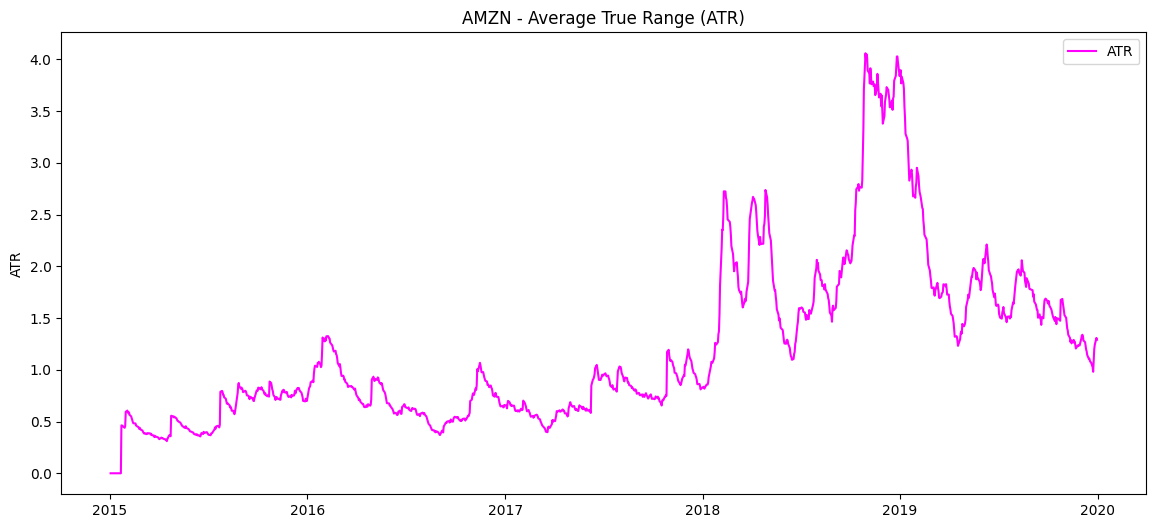

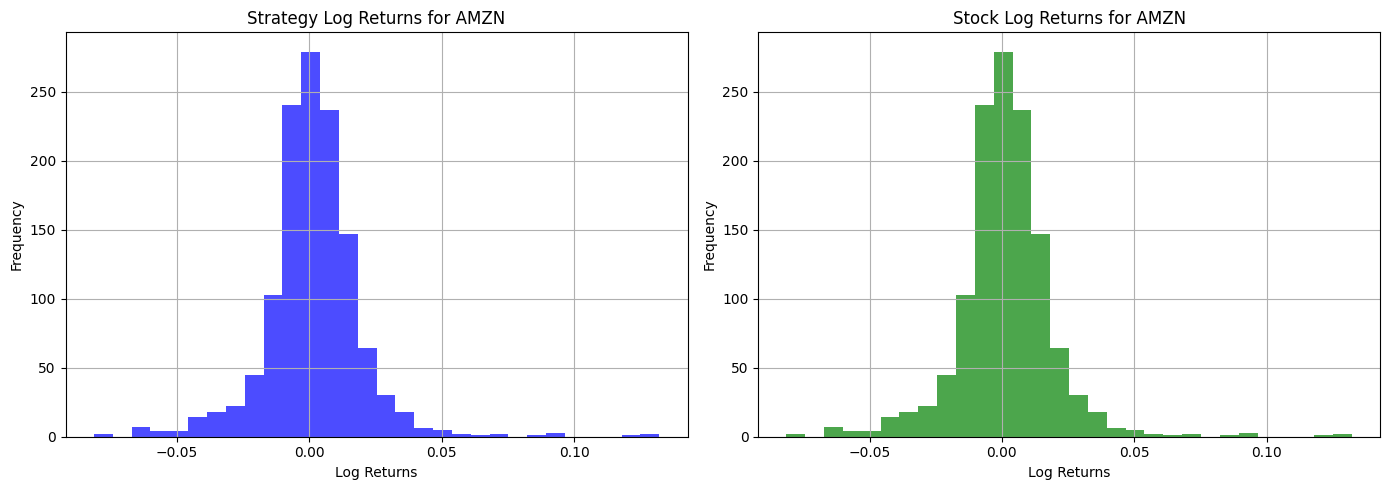

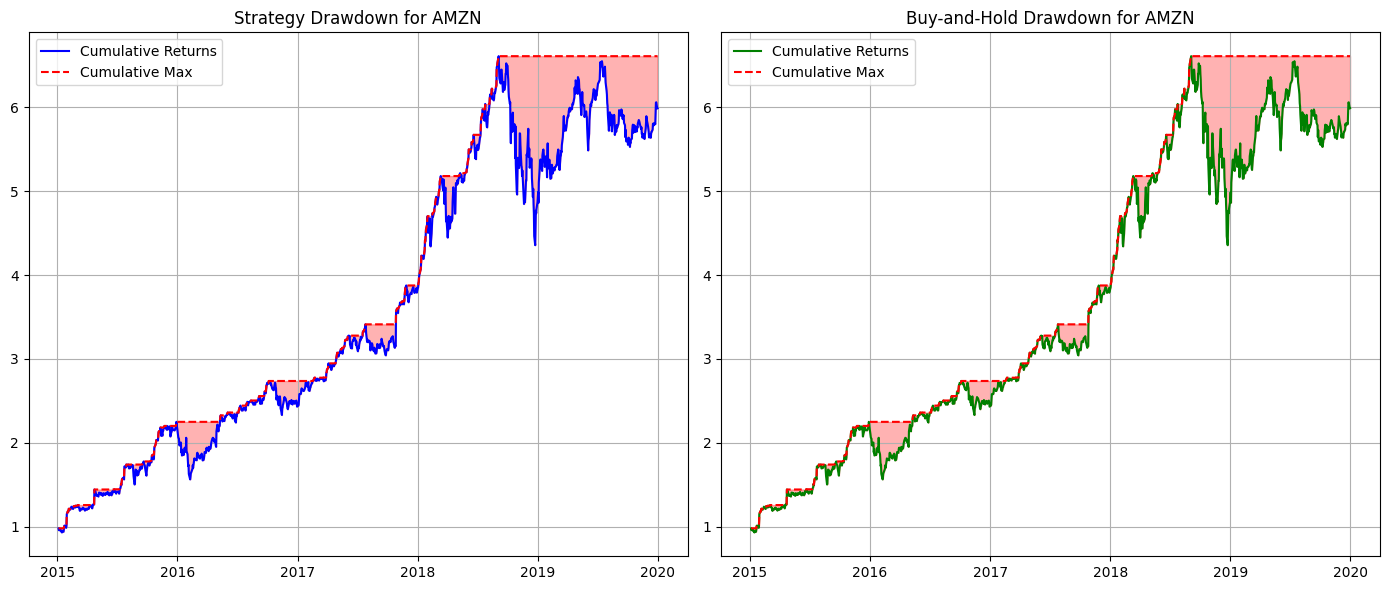

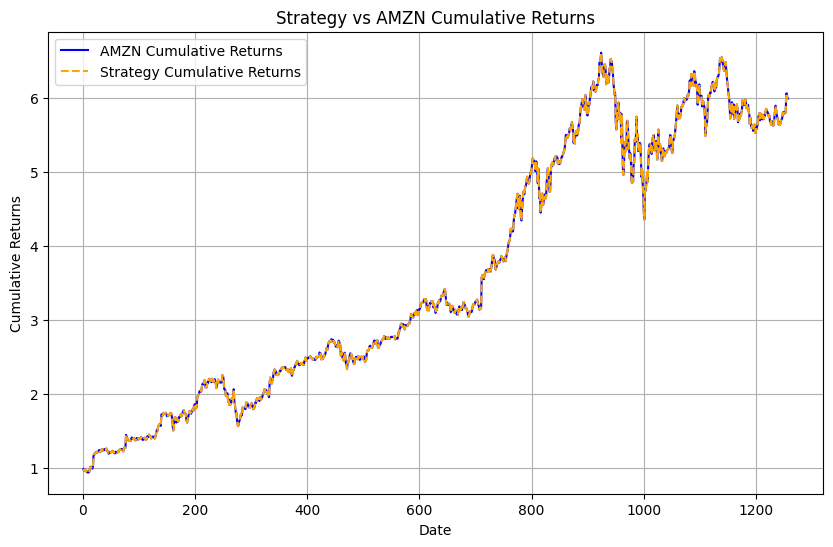

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


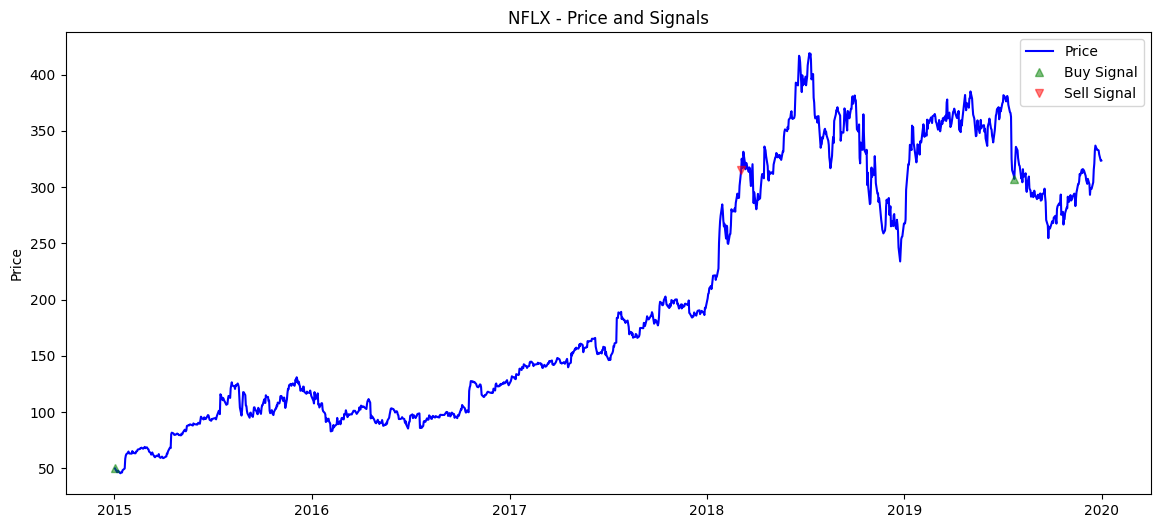

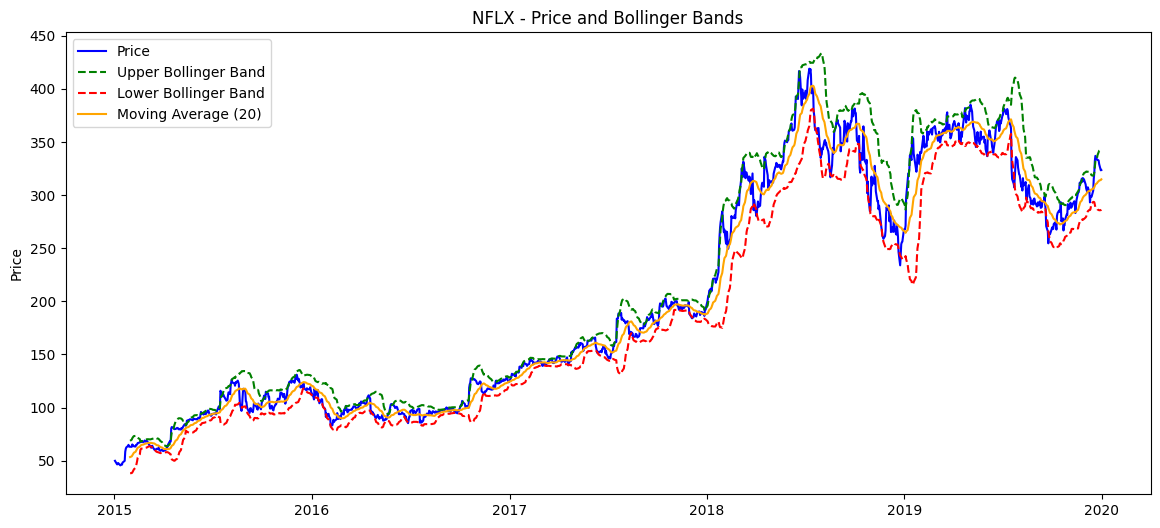

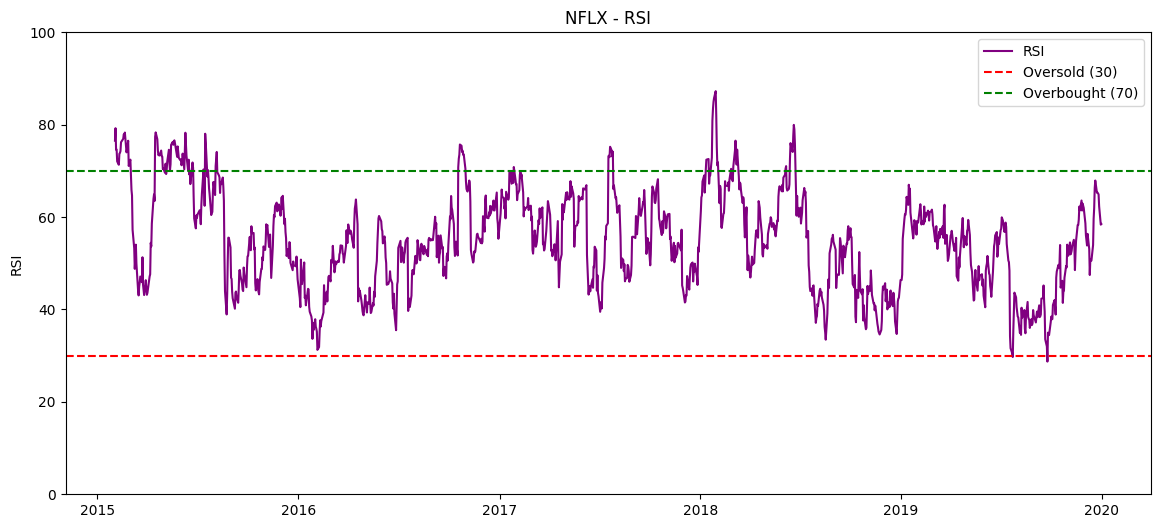

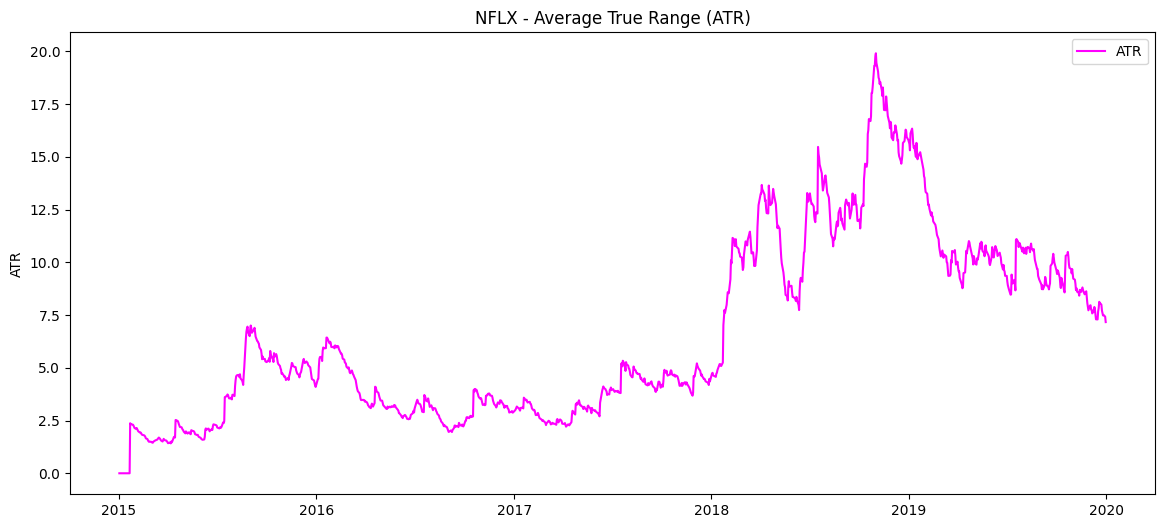

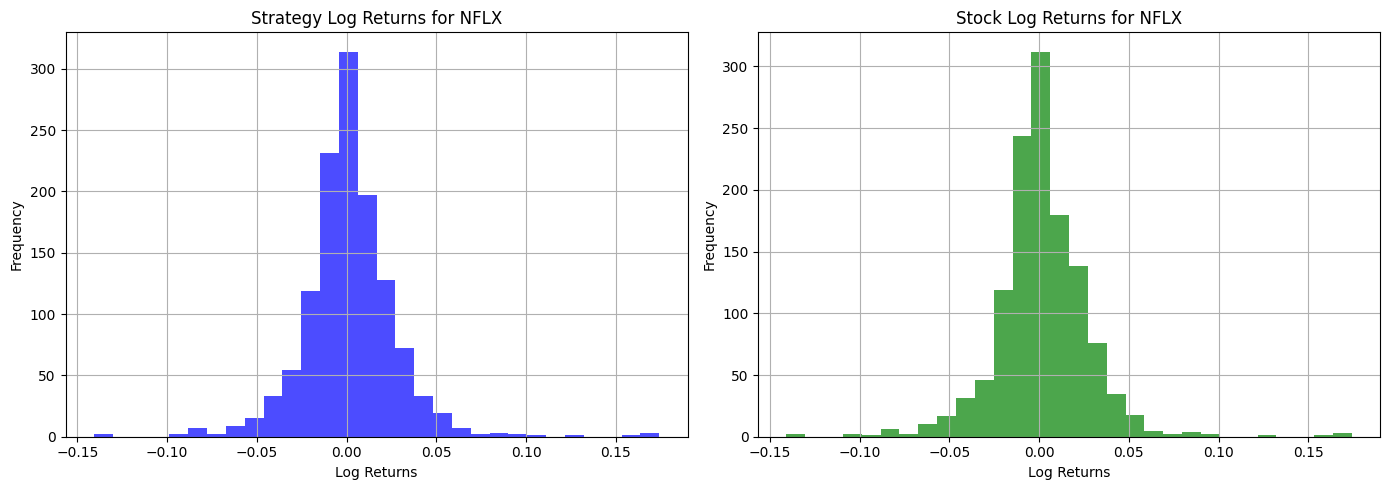

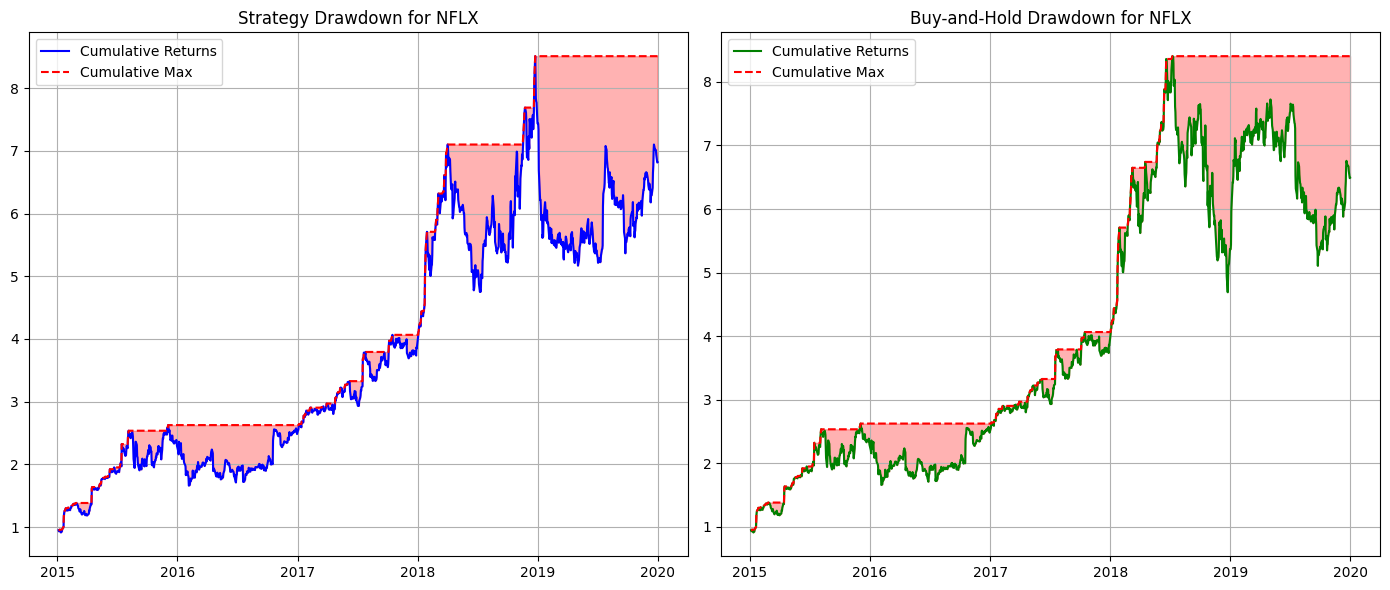

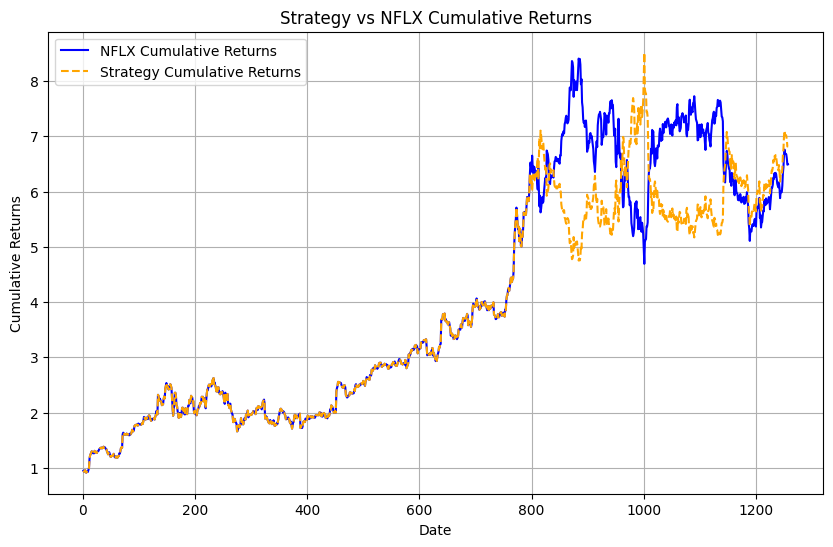

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


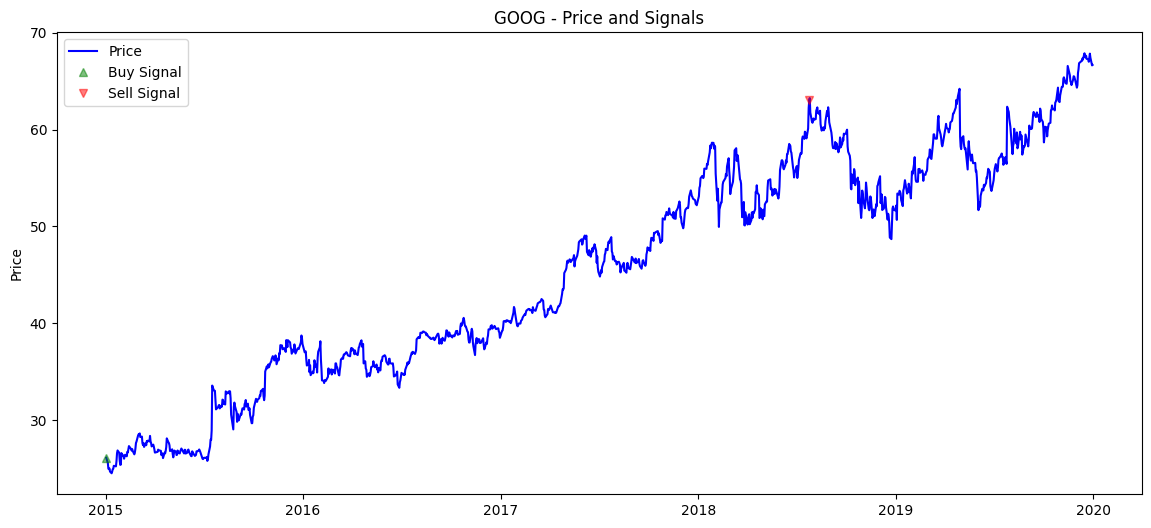

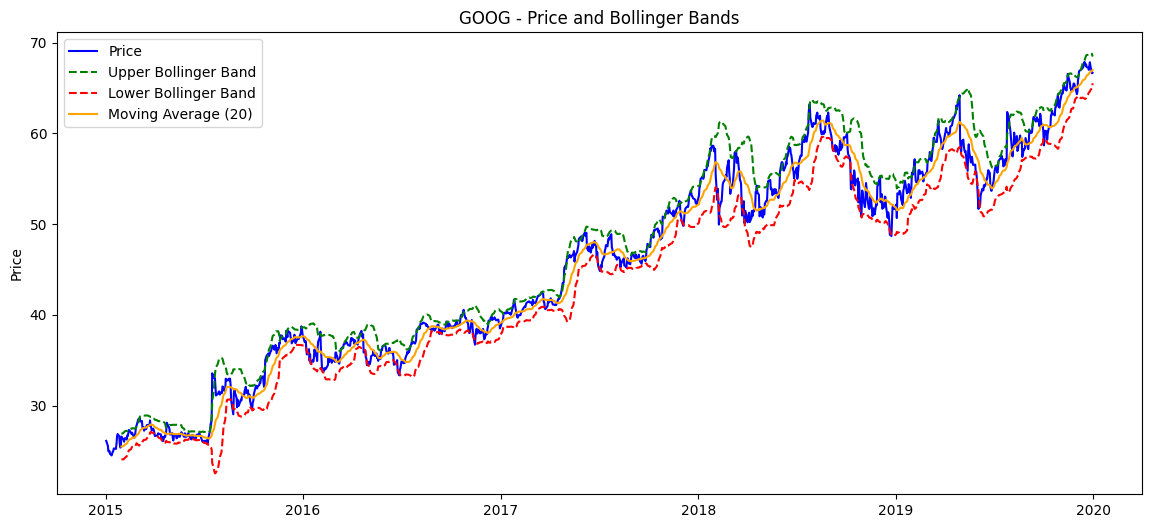

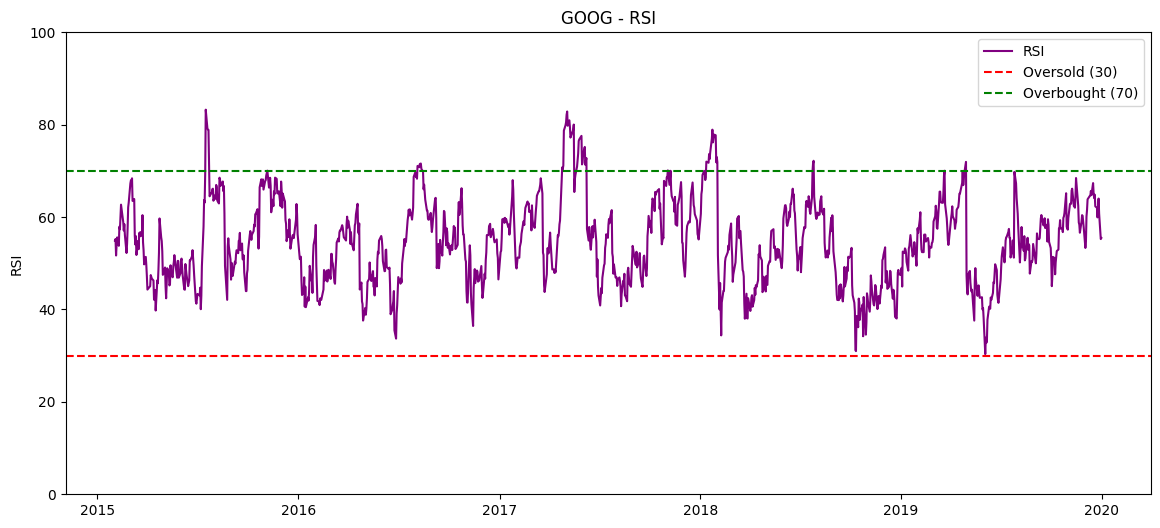

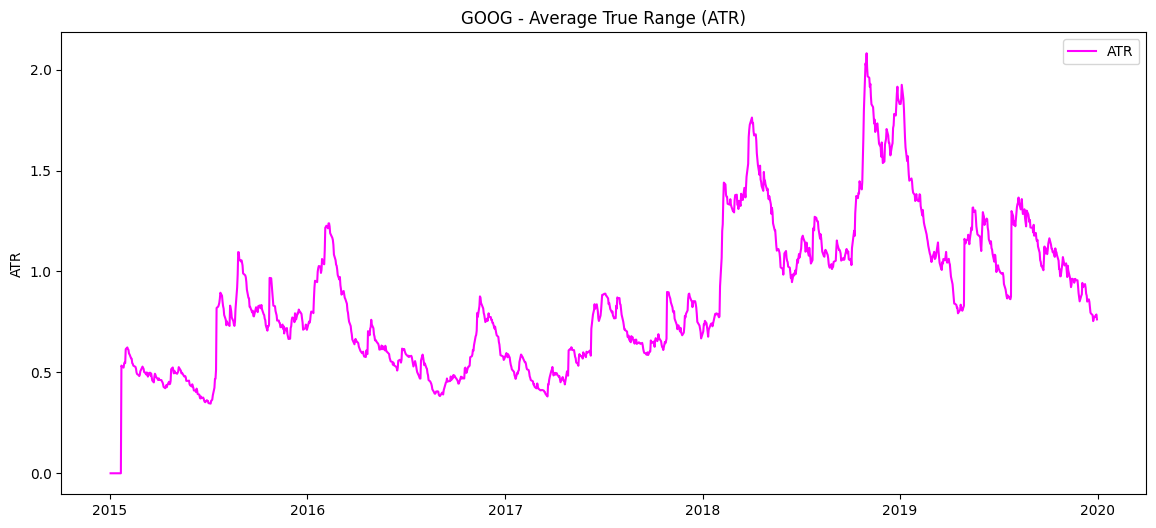

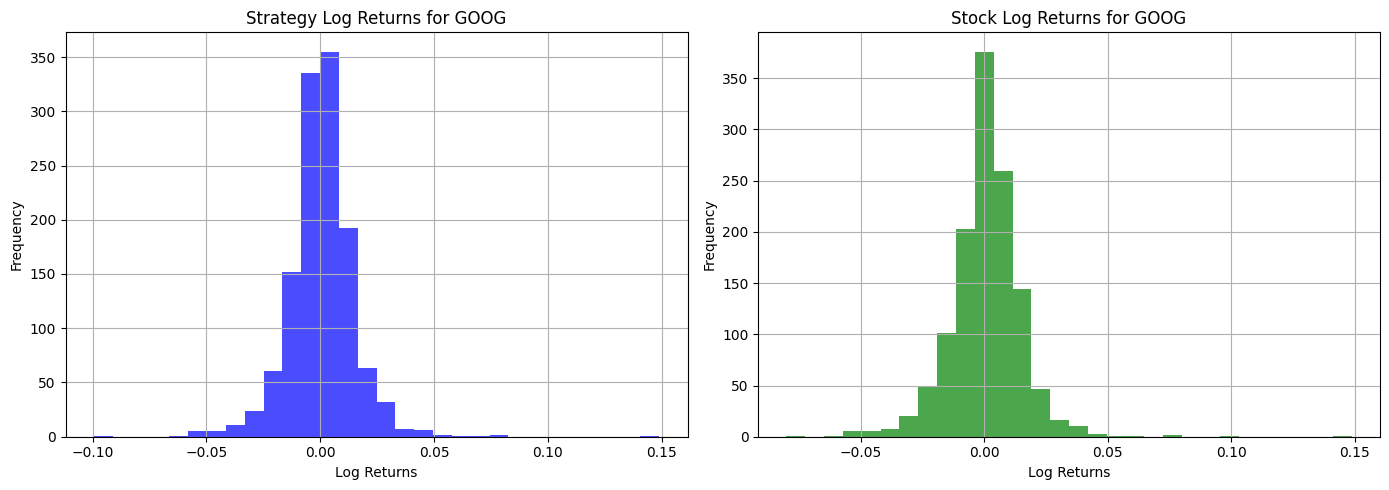

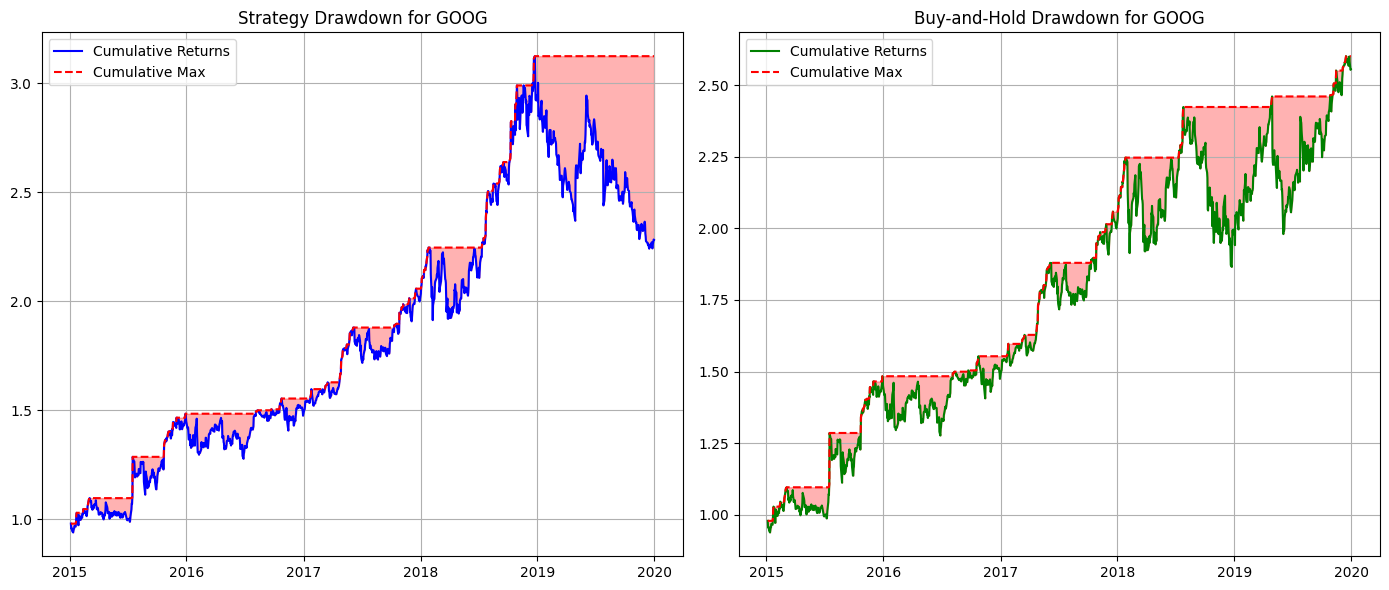

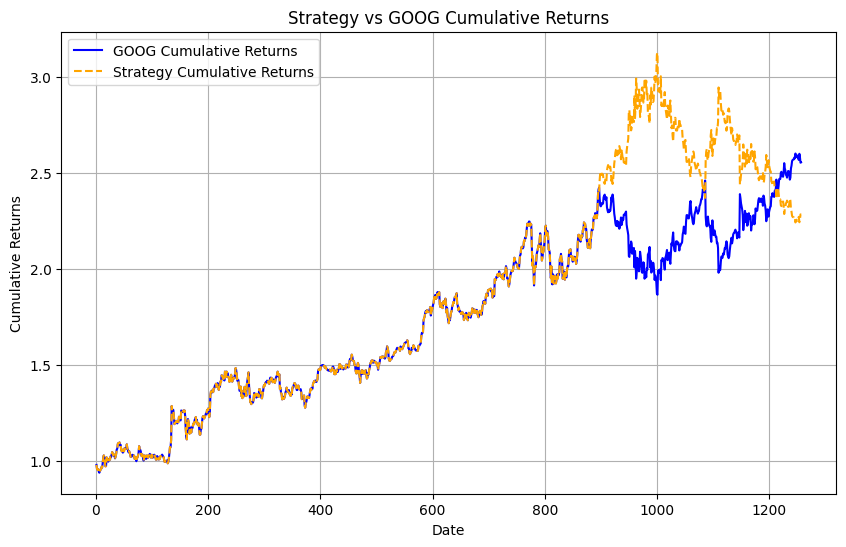

[*********************100%%**********************]  1 of 1 completed


,Stock Returns,Strat Returns,Stock Alpha,Strat Alpha,Stock Beta,Strat Beta,Stock SD,Strat SD,Stock SR,Strat SR,Max Drawdown Stock,Max Drawdown Strat,Sortino Ratio Stock,Sortino Ratio Strat,Calmar Ratio Stock,Calmar Ratio Strat,Treynor Ratio Stock,Treynor Ratio Strat,Information Ratio Stock,Information Ratio Strat
META,0.232967,0.232967,0.092325,0.092325,1.183681,1.183681,0.282188,0.282188,0.825573,0.825573,1.191077,1.191077,1.178649,1.178649,0.195594,0.195594,0.196816,0.196816,0.486881,0.486881
AAPL,0.246032,0.412915,0.098398,0.320297,1.242527,0.779493,0.248374,0.248351,0.990570,1.662626,0.873577,0.855205,1.432638,2.588856,0.281637,0.482825,0.198009,0.529722,0.680745,1.294928
AMZN,0.401331,0.401331,0.244377,0.244377,1.320969,1.320969,0.292501,0.292501,1.372067,1.372067,2.254473,2.254473,2.190654,2.190654,0.178016,0.178016,0.303816,0.303816,1.194408,1.194408
NFLX,0.460873,0.470881,0.278816,0.439057,1.532245,0.267845,0.416752,0.417323,1.105868,1.128339,3.713045,3.341095,1.755014,1.812358,0.124123,0.140936,0.300783,1.758036,0.926183,0.824363
GOOG,0.216612,0.193986,0.075044,0.156955,1.191477,0.311666,0.240049,0.239963,0.902369,0.808398,0.558130,0.883936,1.377467,1.238051,0.388104,0.219457,0.181802,0.622417,0.540831,0.296364


In [6]:
overall_individual_stock_metrics = pd.DataFrame()
# Stock Level Analysis
for index in indices:
    strategy2 = Strategy2(stock_symbol=index, start_date=start, end_date=end, bb_window=best_bb_window, bb_sd=best_bb_sd, rsi_window=best_rsi_window, atr_window=best_atr_window)
    strategy2.run_strategy()
    strategy2.plot_all_charts()
    metrics = strategy2.calculate_stock_metrics()
    overall_individual_stock_metrics = pd.concat([overall_individual_stock_metrics, metrics])
overall_individual_stock_metrics

# Strategy Analysis
1. Analysis done in 2 parts, charts and metrics. 
2. Strategy's performance compared to a buy-and-hold strategy.
3. Portfolio used to measure performance is an equal-weighted MAANG portfolio.

### Charts Used
1. Cumulative Returns
2. Histogram of Log Returns 
3. Drawdown chart

### Metrics Used
1. Average Annualized Returns
2. Alpha
3. Beta
4. Standard Deviation
5. Sharpe Ratio
6. Max Drawdown
7. Sortino Ratio
8. Information Ratio
9. Calmar Ratio
10. Treynor Ratio


### Calculate Cumulative Returns of Strategy and Buy-and-Hold Strategy

In [7]:
# Calculate Returns of Strategy 
strat_df = pd.DataFrame()

for index in indices:
    # Initialize and run the strategy for each stock
    strategy2 = Strategy2(stock_symbol=index, start_date=start, end_date=end, bb_window=best_bb_window, bb_sd=best_bb_sd, rsi_window=best_rsi_window, atr_window=best_atr_window)
    strategy2.run_strategy()

    if strat_df.empty:
        strat_df = strategy2.stock_data[['Date', f'{index}_Strategy_Returns']]
    else:
        strat_df = pd.merge(strat_df, strategy2.stock_data[['Date', f'{index}_Strategy_Returns']], on='Date', how='inner')

daily_index_return_columns = [col for col in strat_df.columns if '_Strategy_Returns' in col]
strat_df['Strat_Returns'] = strat_df[daily_index_return_columns].mean(axis=1)

# Calculate Returns of Buy-and-Hold Strategy
buyhold_df = pd.DataFrame()

for stock in indices:
    ticker_data = yf.download(stock, start, end).reset_index()
    ticker_data[f'{stock}_Returns'] = ticker_data['Adj Close'].pct_change()

    if buyhold_df.empty:
        buyhold_df = ticker_data[['Date', f'{stock}_Returns']]
    else:
        # Merge cumulative Buy-and-Hold returns for other stocks
        buyhold_df = pd.merge(buyhold_df, ticker_data[['Date', f'{stock}_Returns']], on='Date', how='inner')

daily_index_return_columns = [col for col in buyhold_df.columns if '_Returns' in col]
buyhold_df['BuyHold_Returns'] = buyhold_df[daily_index_return_columns].mean(axis=1)

# Calculate Cumulative Returns for Strategy
# Step 1: Calculate log returns for the stock 
strat_df['Log_Return'] = np.log(1 + strat_df['Strat_Returns'])
# Step 2: Calculate the cumulative log returns
strat_df['Cumulative_Log_Return'] = strat_df['Log_Return'].cumsum()
# Step 3: Convert cumulative log returns to cumulative linear returns
strat_df['Cumulative_Linear_Return'] = np.exp(strat_df['Cumulative_Log_Return']) 

# Calculate Cumulative Returns for Buy-and-Hold Strategy
# Step 1: Calculate log returns for the stock 
buyhold_df['Log_Return'] = np.log(1 + buyhold_df['BuyHold_Returns'])
# Step 2: Calculate the cumulative log returns
buyhold_df['Cumulative_Log_Return'] = buyhold_df['Log_Return'].cumsum()
# Step 3: Convert cumulative log returns to cumulative linear returns
buyhold_df['Cumulative_Linear_Return'] = np.exp(buyhold_df['Cumulative_Log_Return']) 

[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


### Performance Analysis - Charts
#### Strategy vs Buy-and-Hold Strategy

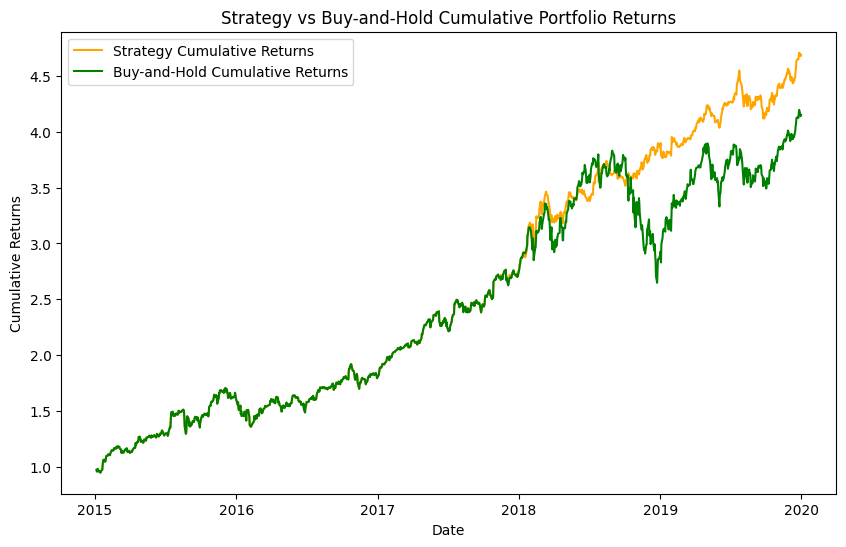

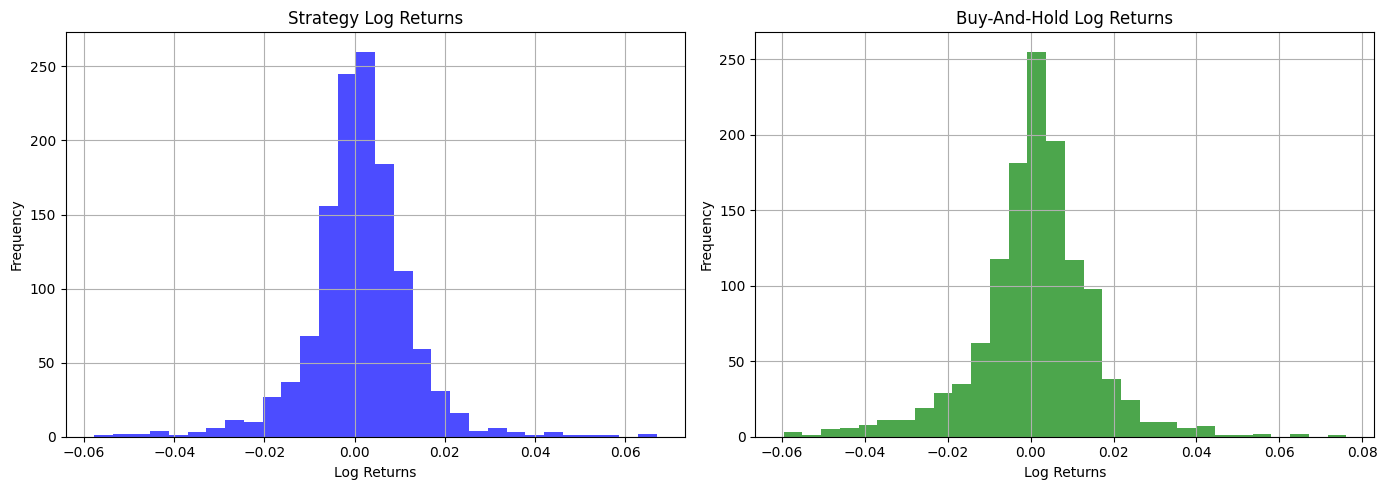

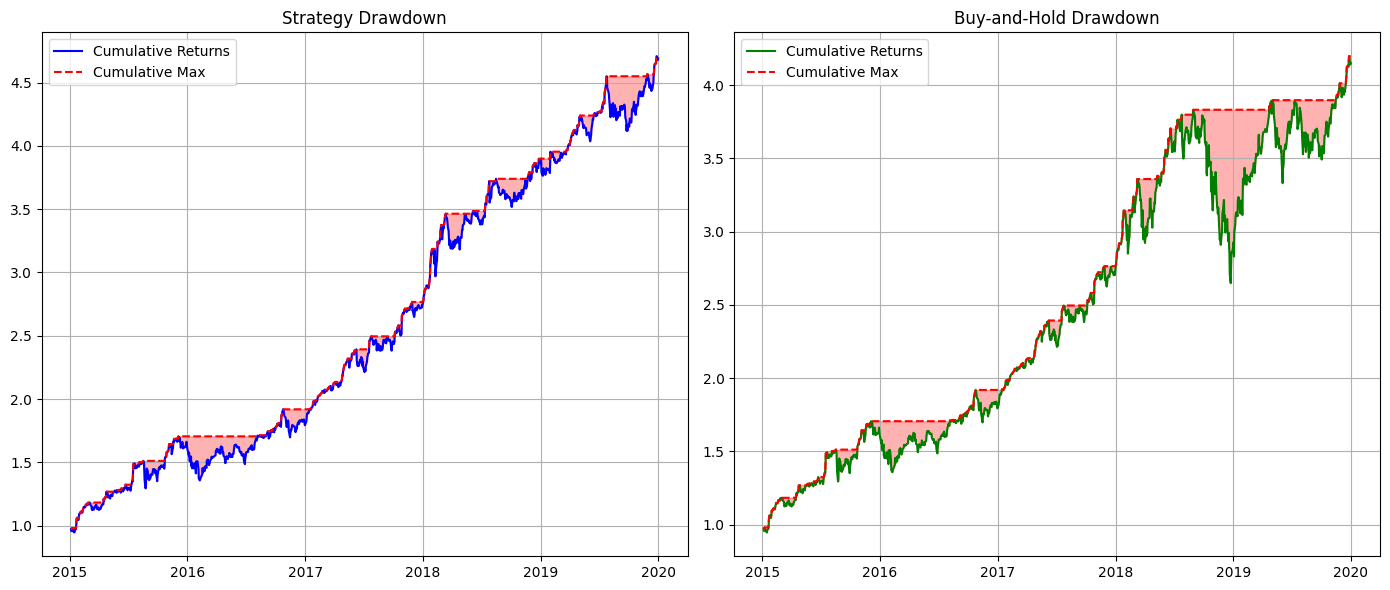

In [8]:
# Plot Cumulative Strategy Portfolio Returns
plt.figure(figsize=(10, 6))
plt.plot(strat_df['Date'], strat_df['Cumulative_Linear_Return'], label='Strategy Cumulative Returns', color='orange')
# Plot Cumulative Buy-and-Hold Portfolio Returns
plt.plot(buyhold_df['Date'], buyhold_df['Cumulative_Linear_Return'], label='Buy-and-Hold Cumulative Returns', color='green')

plt.title('Strategy vs Buy-and-Hold Cumulative Portfolio Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()


# Function to plot histograms
def plot_histogram(data, ax, title, color):
    ax.hist(data.dropna(), bins=30, color=color, alpha=0.7)
    ax.set_title(title)
    ax.set_xlabel('Log Returns')
    ax.set_ylabel('Frequency')
    ax.grid(True)

# Create subplots for strategy log returns and buy-and-hold log returns
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
plot_histogram(strat_df['Log_Return'], ax[0], "Strategy Log Returns", 'blue')
plot_histogram(buyhold_df['Log_Return'], ax[1], "Buy-And-Hold Log Returns", 'green')
plt.tight_layout()
plt.show()


# Function to plot drawdowns
def calculate_drawdown(data, returns, ax, title, color):
    cumulative_returns = (1 + returns).cumprod()
    cum_max = cumulative_returns.cummax()
    drawdown = cum_max - cumulative_returns
    ax.plot(data['Date'], cumulative_returns, label='Cumulative Returns', color=color)
    ax.plot(data['Date'], cum_max, label='Cumulative Max', linestyle='--', color='red')
    ax.fill_between(data['Date'], cum_max, cumulative_returns, color='red', alpha=0.3)
    ax.set_title(title)
    ax.legend()
    ax.grid(True)

# Create subplots for strategy and buy-and-hold drawdowns
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
calculate_drawdown(strat_df, strat_df['Strat_Returns'], ax[0], "Strategy Drawdown", 'blue')
calculate_drawdown(buyhold_df, buyhold_df['BuyHold_Returns'], ax[1], "Buy-and-Hold Drawdown", 'green')
plt.tight_layout()
plt.show()

### Performance Analysis - Metrics
#### Strategy vs Buy-and-Hold Strategy

In [9]:
def calculate_benchmark_returns():
    # Download the SPY data
    benchmark_data = yf.download('SPY', start=start, end=end).reset_index()

    # Calculate daily percentage returns for SPY
    benchmark_data['SPY_Returns'] = benchmark_data['Adj Close'].pct_change()

    # Convert percentage returns to log returns (for use in calculations)
    benchmark_data['Log_SPY_Returns'] = np.log1p(benchmark_data['SPY_Returns'])

    # Return only the daily log returns for further analysis
    return benchmark_data['SPY_Returns']

# Risk Free Rate assumed to be 0
risk_free_rate = 0

# Daily log returns of the stock
buyhold_returns = buyhold_df['BuyHold_Returns']
strategy_returns = strat_df['Strat_Returns']
benchmark_returns = calculate_benchmark_returns()

# Remove NaN values
merged_data = pd.DataFrame({
    'buyhold_returns': buyhold_returns,
    'strategy_returns': strategy_returns,
    'benchmark_returns': benchmark_returns
}).dropna()

# Calculate Beta
covariance_buyhold = np.cov(merged_data['buyhold_returns'], merged_data['benchmark_returns'])[0, 1]
variance_buyhold = np.var(merged_data['benchmark_returns'])
beta_buyhold = covariance_buyhold / variance_buyhold if variance_buyhold != 0 else np.nan

covariance_strat = np.cov(merged_data['strategy_returns'], merged_data['benchmark_returns'])[0, 1]
variance_strat = np.var(merged_data['benchmark_returns'])
beta_strat = covariance_strat / variance_strat if variance_strat != 0 else np.nan

# Calculate Alpha
buyhold_yearly_return = merged_data['buyhold_returns'].mean() * 252
strat_yearly_return = merged_data['strategy_returns'].mean() * 252
benchmark_yearly_return = merged_data['benchmark_returns'].mean() * 252
alpha_buyhold = (buyhold_yearly_return - risk_free_rate - beta_buyhold * (benchmark_yearly_return - risk_free_rate))
alpha_strat = (strat_yearly_return - risk_free_rate - beta_strat * (benchmark_yearly_return - risk_free_rate))

# Calculate Standard Deviation
buyhold_daily_sd = merged_data['buyhold_returns'].std()
strat_daily_sd = merged_data['strategy_returns'].std()
std_dev_strat = strat_daily_sd * np.sqrt(252)  # Annualized standard deviation for Strategy
std_dev_buyhold = buyhold_daily_sd * np.sqrt(252)  # Annualized standard deviation for Buy-and-Hold

# Calculate Sharpe Ratio
daily_SR_buyhold = (merged_data['buyhold_returns'].mean() - risk_free_rate) / buyhold_daily_sd
daily_SR_strat = (merged_data['strategy_returns'].mean() - risk_free_rate) / strat_daily_sd
annual_SR_buyhold = daily_SR_buyhold * np.sqrt(252)
annual_SR_strat = daily_SR_strat * np.sqrt(252)

# Calculate Maximum Drawdown
cumulative_returns_strat = (1 + merged_data['strategy_returns']).cumprod()
cum_max_strat = cumulative_returns_strat.cummax()
drawdown_strat = cum_max_strat - cumulative_returns_strat
max_drawdown_strat = drawdown_strat.max()

cumulative_returns_buyhold = (1 + merged_data['buyhold_returns']).cumprod()
cum_max_buyhold = cumulative_returns_buyhold.cummax()
drawdown_buyhold = cum_max_buyhold - cumulative_returns_buyhold
max_drawdown_buyhold = drawdown_buyhold.max()

# Calculate Sortino Ratio
converted_returns_strat = merged_data['strategy_returns'].apply(lambda x: 0 if x > 0 else x)
squared_converted_returns_strat = converted_returns_strat ** 2
squared_sum_converted_returns_strat = np.sum(squared_converted_returns_strat)
downside_deviation_strat = np.sqrt(squared_sum_converted_returns_strat / len(converted_returns_strat))
annual_converted_sd_strat = downside_deviation_strat * np.sqrt(252)
sortino_ratio_strat = (strat_yearly_return) / annual_converted_sd_strat

converted_returns_buyhold = merged_data['buyhold_returns'].apply(lambda x: 0 if x > 0 else x)
squared_converted_returns_buyhold = converted_returns_buyhold ** 2
squared_sum_converted_returns_buyhold = np.sum(squared_converted_returns_buyhold)
downside_deviation_buyhold = np.sqrt(squared_sum_converted_returns_buyhold / len(converted_returns_buyhold))
annual_converted_sd_buyhold = downside_deviation_buyhold * np.sqrt(252)
sortino_ratio_buyhold = (buyhold_yearly_return) / annual_converted_sd_buyhold

# Calculate Calmar Ratio
calmar_ratio_strat = strat_yearly_return / max_drawdown_strat
calmar_ratio_buyhold = buyhold_yearly_return / max_drawdown_buyhold

# Calculate Treynor Ratio
treynor_ratio_strat = (strat_yearly_return - risk_free_rate) / beta_strat
treynor_ratio_buyhold = (buyhold_yearly_return - risk_free_rate) / beta_buyhold

# Calculate Tracking Error 
tracking_error_strat = np.std(merged_data['strategy_returns'] - merged_data['benchmark_returns']) * np.sqrt(252)
tracking_error_buyhold = np.std(merged_data['buyhold_returns'] - merged_data['benchmark_returns']) * np.sqrt(252)

# Calculate Information Ratio
information_ratio_strat = (strat_yearly_return - benchmark_yearly_return) / tracking_error_strat
information_ratio_buyhold = (buyhold_yearly_return - benchmark_yearly_return) / tracking_error_buyhold

# Create a DataFrame to store the metrics
metrics_dict = {
    'Metric': [
        'Returns', 'Alpha', 'Beta', 'SD', 'Sharpe Ratio', 
        'Max Drawdown', 'Sortino Ratio', 'Calmar Ratio', 
        'Treynor Ratio', 'Information Ratio'
    ],
    'Buy-and-Hold': [
        buyhold_yearly_return, alpha_buyhold, beta_buyhold, std_dev_buyhold, annual_SR_buyhold,
        max_drawdown_buyhold, sortino_ratio_buyhold, calmar_ratio_buyhold, 
        treynor_ratio_buyhold, information_ratio_buyhold
    ],
    'Strat': [
        strat_yearly_return, alpha_strat, beta_strat, std_dev_strat, annual_SR_strat,
        max_drawdown_strat, sortino_ratio_strat, calmar_ratio_strat, 
        treynor_ratio_strat, information_ratio_strat
    ]
}

metrics_df = pd.DataFrame(metrics_dict).set_index('Metric')
metrics_df.T

[*********************100%%**********************]  1 of 1 completed


Metric,Returns,Alpha,Beta,SD,Sharpe Ratio,Max Drawdown,Sortino Ratio,Calmar Ratio,Treynor Ratio,Information Ratio
Buy-and-Hold,0.311563,0.157792,1.294180,0.228389,1.364180,1.182958,1.995577,0.263376,0.240742,1.256211
Strat,0.326523,0.234580,0.773816,0.182173,1.792383,0.430533,2.721313,0.758415,0.421965,1.360234
